In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import wilcoxon, ttest_ind
import seaborn as sns

# Reading data

In [2]:
ap_mat_csv = pd.read_csv('OD_Intrinsic_Measure/ap_mat.csv')
ap_mat_csv = ap_mat_csv.set_index('Data').iloc[:,3:]

roc_mat_csv = pd.read_csv('OD_Intrinsic_Measure/roc_mat.csv')
roc_mat_csv = roc_mat_csv.set_index('Data').iloc[:,3:]

prn_mat_csv = pd.read_csv('OD_Intrinsic_Measure/prns_mat.csv')
prn_mat_csv = prn_mat_csv.set_index('Data').iloc[:,3:]

ap_arff_csv = pd.read_csv('OD_Intrinsic_Measure/ap_arff.csv')
ap_arff_csv = ap_arff_csv.set_index('Data').iloc[:,3:]

roc_arff_csv = pd.read_csv('OD_Intrinsic_Measure/roc_arff.csv')
roc_arff_csv = roc_arff_csv.set_index('Data').iloc[:,3:]

prn_arff_csv = pd.read_csv('OD_Intrinsic_Measure/prns_arff.csv')
prn_arff_csv = prn_arff_csv.set_index('Data').iloc[:,3:]

In [3]:
statistics = {}
for i in ap_arff_csv.index:
    try:
        statistics[i] = pd.read_csv('arff_metrics/{}_metrics.csv'.format(i))
    except:
        print("arff", i)
        pass
for i in ap_mat_csv.index:
    try:
        statistics[i] = pd.read_csv('mat_metrics/{}_metrics.csv'.format(i))
    except:
        print("mat:", i)
        pass

In [4]:
# append UDR, UDR1, and MC scores
index_list = statistics['Annthyroid'].columns.to_list()[1:]

for dataset in ap_arff_csv.index:
    udr_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.UDR.csv'.format(dataset), header=None)
    udr_series = pd.Series(udr_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr_series, ignore_index=True)

    udr1_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.MCS.csv'.format(dataset), header=None)
    udr1_series = pd.Series(udr1_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr1_series, ignore_index=True)

    mc_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.MC.csv'.format(dataset), header=None)
    mc_series = pd.Series(mc_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mc_series, ignore_index=True)
    
    udr_ndcg_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.UDR.NDCG.csv'.format(dataset), header=None)
    udr_ndcg_series = pd.Series(udr_ndcg_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr_ndcg_series, ignore_index=True)

    udr1_ndcg_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.MCS.NDCG.csv'.format(dataset), header=None)
    udr1_ndcg_series = pd.Series(udr1_ndcg_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr1_ndcg_series, ignore_index=True)

    mc_ndcg_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.MC.NDCG1.csv'.format(dataset), header=None)
    mc_ndcg_series = pd.Series(mc_ndcg_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mc_ndcg_series, ignore_index=True)
        
    udr_kendall_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.UDR.kendall.csv'.format(dataset), header=None)
    udr_kendall_series = pd.Series(udr_kendall_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr_kendall_series, ignore_index=True)

    udr1_kendall_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.MCS.kendall.csv'.format(dataset), header=None)
    udr1_kendall_series = pd.Series(udr1_kendall_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr1_kendall_series, ignore_index=True)

    mc_kendall_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.MC.kendall.csv'.format(dataset), header=None)
    mc_kendall_series = pd.Series(mc_kendall_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mc_kendall_series, ignore_index=True)

    model_select_all_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.SELECT.ALL.Model.csv'.format(dataset), header=None)
    model_select_all_series = pd.Series(model_select_all_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(model_select_all_series, ignore_index=True)
    
    model_select_last_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.SELECT.LAST.Model.csv'.format(dataset), header=None)
    model_select_last_series = pd.Series(model_select_last_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(model_select_last_series, ignore_index=True)
        
    em_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.em.csv'.format(dataset), header=None)
    em_series = pd.Series(em_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(em_series, ignore_index=True)
        
    mv_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.mv.csv'.format(dataset), header=None)
    mv_series = pd.Series(mv_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mv_series, ignore_index=True)
    
    hits_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.HITS_unify.Model.csv'.format(dataset), header=None)
    hits_series = pd.Series(hits_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(hits_series, ignore_index=True)
    
    hits_rank_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.HITS.RANK.csv'.format(dataset), header=None)
    hits_rank_series = pd.Series(hits_rank_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(hits_rank_series, ignore_index=True)
    
    ireos_scores = pd.read_csv('OD_Intrinsic_Measure/scores_arff/{}.ireos.henry.csv'.format(dataset), header=None, low_memory=False)
    ireos_series = pd.Series(ireos_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(ireos_series, ignore_index=True)

    statistics[dataset].iloc[10, 0] = "UDR"
    statistics[dataset].iloc[11, 0] = "UDR1"
    statistics[dataset].iloc[12, 0] = "MC"

    statistics[dataset].iloc[13, 0] = "UDR_NDCG"
    statistics[dataset].iloc[14, 0] = "UDR1_NDCG"
    statistics[dataset].iloc[15, 0] = "MC_NDCG"
    
    statistics[dataset].iloc[16, 0] = "UDR_KENDALL"
    statistics[dataset].iloc[17, 0] = "UDR1_KENDALL"
    statistics[dataset].iloc[18, 0] = "MC_KENDALL"
    
    statistics[dataset].iloc[19, 0] = "MODEL_ALL"
    statistics[dataset].iloc[20, 0] = "MODEL_LAST"
    
    statistics[dataset].iloc[21, 0] = "EM"
    statistics[dataset].iloc[22, 0] = "MV"
    
    statistics[dataset].iloc[23, 0] = "HITS"
    statistics[dataset].iloc[24, 0] = "HITS_RANK"
    
    statistics[dataset].iloc[25, 0] = "IREOS"
    

In [5]:
statistics['Annthyroid']

,Metric,"('LODA', (5, 10))","('LODA', (5, 20))","('LODA', (5, 30))","('LODA', (5, 40))","('LODA', (5, 50))","('LODA', (5, 75))","('LODA', (5, 100))","('LODA', (5, 150))","('LODA', (5, 200))",...,"('OCSVM', ('sigmoid', 0.7))","('OCSVM', ('sigmoid', 0.8))","('OCSVM', ('sigmoid', 0.9))","('COF', 3)","('COF', 5)","('COF', 10)","('COF', 15)","('COF', 20)","('COF', 25)","('COF', 50)"
0,r2,5.137027e-01,3.988492e-01,3.385247e-01,2.813284e-01,5.589177e-01,3.009649e-01,3.971334e-01,4.181879e-01,4.026557e-01,...,7.120536e-01,7.131009e-01,6.952786e-01,6.925932e-02,1.361471e-01,2.834721e-01,3.758487e-01,4.201683e-01,4.525617e-01,4.939352e-01
1,std,5.120129e-03,2.824654e-03,1.251966e-03,1.917119e-03,7.011995e-04,5.362380e-04,2.383394e-04,1.249111e-04,1.123098e-04,...,5.820997e+00,6.992614e+00,8.527517e+00,2.260949e-01,1.166769e-01,6.054802e-02,4.587143e-02,3.933440e-02,3.513315e-02,2.927845e-02
2,h,1.162948e-03,2.223025e-04,3.368604e-05,6.041844e-05,2.616374e-05,5.199007e-06,1.571431e-06,4.709545e-07,3.570533e-07,...,3.518715e+03,5.103750e+03,6.967700e+03,1.597422e-01,9.010033e-02,6.090676e-02,5.321036e-02,4.708198e-02,4.285141e-02,3.513568e-02
3,ch,7.528645e+03,4.728594e+03,3.647400e+03,2.789908e+03,9.030983e+03,3.068482e+03,4.694853e+03,5.122659e+03,4.804143e+03,...,1.762413e+04,1.771449e+04,1.626158e+04,5.303423e+02,1.123247e+03,2.819577e+03,4.291706e+03,5.164497e+03,5.891819e+03,6.956176e+03
4,s,7.327821e-01,5.700758e-01,5.666302e-01,4.451380e-01,7.088905e-01,5.798103e-01,5.917581e-01,6.195123e-01,6.037772e-01,...,8.656197e-01,8.585653e-01,8.400591e-01,7.526683e-01,7.317438e-01,7.223199e-01,7.229925e-01,7.154545e-01,7.065809e-01,6.803294e-01
5,i,3.473023e-03,5.977791e-04,9.472035e-05,1.487191e-04,9.044715e-05,1.221858e-05,4.232006e-06,1.183323e-06,8.947206e-07,...,3.021206e+04,4.102321e+04,4.801931e+04,4.702586e-01,2.740751e-01,1.895648e-01,1.675969e-01,1.483889e-01,1.346106e-01,1.075109e-01
6,db,4.127487e-01,5.048027e-01,4.367998e-01,5.103159e-01,3.416928e-01,4.302411e-01,4.912173e-01,6.195074e-01,5.545479e-01,...,3.356671e-01,3.130679e-01,3.059251e-01,6.916917e-01,6.015012e-01,5.479876e-01,5.193493e-01,5.062034e-01,4.936620e-01,4.781887e-01
7,xbs,6.559772e-02,1.044416e-01,1.354011e-01,1.770173e-01,5.468529e-02,1.609467e-01,1.051922e-01,9.640735e-02,1.027992e-01,...,2.802192e-02,2.787899e-02,3.036987e-02,9.312136e-01,4.396735e-01,1.751546e-01,1.150736e-01,9.562635e-02,8.382164e-02,7.099618e-02
8,sd,8.577115e-01,1.995317e+00,6.293204e-01,6.056618e-01,6.395011e-01,5.342143e-01,8.943687e-01,1.390889e+00,9.330695e-01,...,1.500667e+00,1.374037e+00,1.408288e+00,3.435414e+00,3.275315e+00,2.756791e+00,2.415126e+00,2.150926e+00,1.921115e+00,1.364477e+00
9,dunn,2.479710e-04,5.404175e-06,7.159459e-05,9.520366e-06,1.945706e-03,5.488734e-04,3.569266e-05,4.656736e-05,3.583180e-05,...,1.782343e-04,4.030976e-05,4.834477e-04,4.462616e-06,3.473680e-06,6.297018e-06,4.657316e-05,1.223158e-06,6.055902e-05,2.031168e-04


In [6]:
for dataset in ap_mat_csv.index:
    udr_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.UDR.csv'.format(dataset), header=None)
    udr_series = pd.Series(udr_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr_series, ignore_index=True)

    udr1_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.MCS.csv'.format(dataset), header=None)
    udr1_series = pd.Series(udr1_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr1_series, ignore_index=True)

    mc_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.MC.csv'.format(dataset), header=None)
    mc_series = pd.Series(mc_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mc_series, ignore_index=True)
    
    udr_ndcg_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.UDR.NDCG.csv'.format(dataset), header=None)
    udr_ndcg_series = pd.Series(udr_ndcg_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr_ndcg_series, ignore_index=True)

    udr1_ndcg_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.MCS.NDCG.csv'.format(dataset), header=None)
    udr1_ndcg_series = pd.Series(udr1_ndcg_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr1_ndcg_series, ignore_index=True)

    mc_ndcg_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.MC.NDCG1.csv'.format(dataset), header=None)
    mc_ndcg_series = pd.Series(mc_ndcg_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mc_ndcg_series, ignore_index=True)
        
    udr_kendall_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.UDR.kendall.csv'.format(dataset), header=None)
    udr_kendall_series = pd.Series(udr_kendall_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr_kendall_series, ignore_index=True)

    udr1_kendall_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.MCS.kendall.csv'.format(dataset), header=None)
    udr1_kendall_series = pd.Series(udr1_kendall_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(udr1_kendall_series, ignore_index=True)

    mc_kendall_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.MC.kendall.csv'.format(dataset), header=None)
    mc_kendall_series = pd.Series(mc_kendall_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mc_kendall_series, ignore_index=True)
    
    model_select_all_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.mat.SELECT.ALL.Model.csv'.format(dataset), header=None)
    model_select_all_series = pd.Series(model_select_all_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(model_select_all_series, ignore_index=True)

    model_select_last_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.mat.SELECT.LAST.Model.csv'.format(dataset), header=None)
    model_select_last_series = pd.Series(model_select_last_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(model_select_last_series, ignore_index=True)

    em_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.mat.em.csv'.format(dataset), header=None)
    em_series = pd.Series(em_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(em_series, ignore_index=True)
        
    mv_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.mat.mv.csv'.format(dataset), header=None)
    mv_series = pd.Series(mv_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(mv_series, ignore_index=True)
    
    hits_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.mat.HITS_unify.Model.csv'.format(dataset), header=None)
    hits_series = pd.Series(hits_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(hits_series, ignore_index=True)
    
    hits_rank_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.HITS.RANK.csv'.format(dataset), header=None)
    hits_rank_series = pd.Series(hits_rank_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(hits_rank_series, ignore_index=True)
    
    ireos_scores = pd.read_csv('OD_Intrinsic_Measure/scores_mat/{}.mat.ireos.henry.csv'.format(dataset), header=None, low_memory=False)
    ireos_series = pd.Series(ireos_scores.to_numpy()[:,0], index=index_list)
    statistics[dataset] = statistics[dataset].append(ireos_series, ignore_index=True)

    
    statistics[dataset].iloc[10, 0] = "UDR"
    statistics[dataset].iloc[11, 0] = "UDR1"
    statistics[dataset].iloc[12, 0] = "MC"
    
    statistics[dataset].iloc[13, 0] = "UDR_NDCG"
    statistics[dataset].iloc[14, 0] = "UDR1_NDCG"
    statistics[dataset].iloc[15, 0] = "MC_NDCG"
        
    statistics[dataset].iloc[16, 0] = "UDR_KENDALL"
    statistics[dataset].iloc[17, 0] = "UDR1_KENDALL"
    statistics[dataset].iloc[18, 0] = "MC_KENDALL"
    
    statistics[dataset].iloc[19, 0] = "MODEL_ALL"
    statistics[dataset].iloc[20, 0] = "MODEL_LAST"
    
    statistics[dataset].iloc[21, 0] = "EM"
    statistics[dataset].iloc[22, 0] = "MV"
    
    statistics[dataset].iloc[23, 0] = "HITS"
    statistics[dataset].iloc[24, 0] = "HITS_RANK"
    
    statistics[dataset].iloc[25, 0] = "IREOS"
    

In [7]:
statistics['arrhythmia']

,Metric,"('LODA', (5, 10))","('LODA', (5, 20))","('LODA', (5, 30))","('LODA', (5, 40))","('LODA', (5, 50))","('LODA', (5, 75))","('LODA', (5, 100))","('LODA', (5, 150))","('LODA', (5, 200))",...,"('OCSVM', ('sigmoid', 0.7))","('OCSVM', ('sigmoid', 0.8))","('OCSVM', ('sigmoid', 0.9))","('COF', 3)","('COF', 5)","('COF', 10)","('COF', 15)","('COF', 20)","('COF', 25)","('COF', 50)"
0,r2,3.623704e-01,4.536161e-01,4.938575e-01,5.337957e-01,4.660209e-01,5.031979e-01,4.822602e-01,5.394784e-01,5.021459e-01,...,4.241496e-01,4.550946e-01,4.888529e-01,6.687659e-01,6.719398e-01,6.613951e-01,6.645457e-01,6.506706e-01,6.337122e-01,6.111130e-01
1,std,2.091790e-03,7.964329e-04,3.293832e-04,1.499884e-04,1.349290e-04,9.706613e-05,6.686211e-05,3.185432e-05,2.334636e-05,...,7.090559e-02,7.501244e-02,8.009659e-02,1.240829e-02,1.031965e-02,8.746937e-03,7.866281e-03,7.408279e-03,7.114145e-03,5.738564e-03
2,h,1.359680e-03,2.879422e-04,5.788264e-05,1.408415e-05,8.687767e-06,5.218040e-06,2.276913e-06,6.499460e-07,3.005957e-07,...,2.024822e+00,2.569589e+00,3.354879e+00,1.699729e-01,1.192678e-01,8.171397e-02,6.702656e-02,5.589554e-02,4.787752e-02,2.829574e-02
3,ch,2.557389e+02,3.735967e+02,4.390777e+02,5.152421e+02,3.927297e+02,4.557933e+02,4.191625e+02,5.271529e+02,4.538792e+02,...,3.314530e+02,3.758314e+02,4.303728e+02,9.085558e+02,9.216997e+02,8.789826e+02,8.914643e+02,8.381823e+02,7.785422e+02,7.071485e+02
4,s,3.910909e-01,4.994355e-01,5.494131e-01,5.831101e-01,5.181211e-01,5.632408e-01,5.398667e-01,6.056802e-01,5.633359e-01,...,7.906871e-01,7.978545e-01,8.051024e-01,6.946585e-01,6.940608e-01,6.934108e-01,7.055478e-01,7.046962e-01,6.994529e-01,6.851921e-01
5,i,1.829090e-03,5.014953e-04,1.060215e-04,2.651057e-05,1.533770e-05,9.183893e-06,3.890961e-06,1.166611e-06,5.486351e-07,...,6.597860e+00,9.029652e+00,1.256219e+01,4.492767e-01,3.199180e-01,2.096079e-01,1.746031e-01,1.403367e-01,1.140685e-01,6.247963e-02
6,db,7.331898e-01,5.529558e-01,5.541045e-01,5.424471e-01,5.358900e-01,5.964010e-01,6.082141e-01,6.111074e-01,5.869075e-01,...,8.224351e-01,7.862105e-01,7.440724e-01,4.792813e-01,4.441034e-01,4.721011e-01,4.878292e-01,5.134141e-01,5.391958e-01,5.752533e-01
7,xbs,2.194169e-01,1.501979e-01,1.277984e-01,1.089069e-01,1.428806e-01,1.231116e-01,1.338704e-01,1.064462e-01,1.236308e-01,...,1.692953e-01,1.493048e-01,1.303833e-01,6.176114e-02,6.088039e-02,6.383908e-02,6.294525e-02,6.694658e-02,7.207501e-02,7.935171e-02
8,sd,1.885539e+00,1.545049e+00,9.636902e-01,1.085944e+00,9.069652e-01,1.270797e+00,1.269377e+00,1.194656e+00,1.164220e+00,...,1.805194e+00,1.807193e+00,1.870633e+00,1.006673e+00,1.043235e+00,9.659420e-01,1.053655e+00,1.145236e+00,1.277969e+00,1.204491e+00
9,dunn,1.046166e-03,2.686008e-03,1.747984e-03,3.920845e-03,2.308200e-03,1.175863e-03,2.224022e-03,2.350892e-03,4.628945e-03,...,3.412716e-05,6.038220e-04,2.361309e-03,4.582429e-03,8.617922e-03,3.583567e-03,3.078926e-03,8.652271e-03,2.024409e-03,9.336913e-04


In [8]:
def get_ap_by_best_metric_model(key, index, select_max, mat_csv, arff_csv, statistics):
    # some are max while others are min
    if key in set(mat_csv.index):
        if select_max:
            best_model_by_metric = statistics[key].set_index("Metric").idxmax(axis=1)[index]
        else:
            best_model_by_metric = statistics[key].set_index("Metric").idxmin(axis=1)[index]
        return mat_csv[mat_csv.index == key][best_model_by_metric].item()
    elif key in set(arff_csv.index):
        if select_max:
            best_model_by_metric = statistics[key].set_index("Metric").idxmax(axis=1)[index]
        else:
            best_model_by_metric = statistics[key].set_index("Metric").idxmin(axis=1)[index]
        try:
            return arff_csv[arff_csv.index == key][best_model_by_metric].item()
        except:
            print(arff_csv[arff_csv.index == key][best_model_by_metric])
            assert False
    else:
        assert False

# AP

In [9]:
##################################
# AP
##################################
r2_ap = []
std_ap = []
h_ap = []
ch_ap = []
s_ap = []
i_indices_ap = []
db_ap = []
xbs_ap = []
sd_ap = []
dunn_ap = []
udr_ap = []
udr1_ap = []
mc_ap = []
udr_ndcg_ap = []
udr1_ndcg_ap = []
mc_ndcg_ap = []
udr_kendall_ap = []
udr1_kendall_ap = []
mc_kendall_ap = []
model_all_ap = []
model_last_ap = []

# ensemble methods
model_all_ensemble_csv = pd.read_csv("SELECT.ALL.csv", index_col="Data")
model_last_ensemble_csv = pd.read_csv("SELECT.LAST.csv", index_col="Data")
model_all_ensemble_ap = []
model_last_ensemble_ap = []

# EM/MV
em_ap = []
mv_ap = []

#hits
hits_ensemble_csv = pd.read_csv("HITS_unify.csv", index_col="Data")
hits_rank_ensemble_csv = pd.read_csv("HITS.RANK.csv", index_col="Data")
hits_ap = []
hits_rank_ap = []
hits_ensemble_ap = []
hits_rank_ensemble_ap = []

# IREOS
ireos_ap = []

q_all_ap = [[] for i in range(297)] # (index, score)

# baselines
random_random_ap = []
educated_random_ap = []

# best ap on each dataset
best_ap = []

# AP
for key, value in statistics.items():
    r2_ap.append(get_ap_by_best_metric_model(key, 0, True, ap_mat_csv, ap_arff_csv, statistics))
    std_ap.append(get_ap_by_best_metric_model(key, 1, False, ap_mat_csv, ap_arff_csv, statistics))
    h_ap.append(get_ap_by_best_metric_model(key, 2, True, ap_mat_csv, ap_arff_csv, statistics))
    ch_ap.append(get_ap_by_best_metric_model(key, 3, True, ap_mat_csv, ap_arff_csv, statistics))
    s_ap.append(get_ap_by_best_metric_model(key, 4, True, ap_mat_csv, ap_arff_csv, statistics))
    i_indices_ap.append(get_ap_by_best_metric_model(key, 5, True, ap_mat_csv, ap_arff_csv, statistics))
    db_ap.append(get_ap_by_best_metric_model(key, 6, False, ap_mat_csv, ap_arff_csv, statistics))
    xbs_ap.append(get_ap_by_best_metric_model(key, 7, False, ap_mat_csv, ap_arff_csv, statistics))
    sd_ap.append(get_ap_by_best_metric_model(key, 8, False, ap_mat_csv, ap_arff_csv, statistics))
    dunn_ap.append(get_ap_by_best_metric_model(key, 9, True, ap_mat_csv, ap_arff_csv, statistics))
    udr_ap.append(get_ap_by_best_metric_model(key, 10, True, ap_mat_csv, ap_arff_csv, statistics))
    udr1_ap.append(get_ap_by_best_metric_model(key, 11, True, ap_mat_csv, ap_arff_csv, statistics))
    mc_ap.append(get_ap_by_best_metric_model(key, 12, True, ap_mat_csv, ap_arff_csv, statistics))
    udr_ndcg_ap.append(get_ap_by_best_metric_model(key, 13, True, ap_mat_csv, ap_arff_csv, statistics))
    udr1_ndcg_ap.append(get_ap_by_best_metric_model(key, 14, True, ap_mat_csv, ap_arff_csv, statistics))
    mc_ndcg_ap.append(get_ap_by_best_metric_model(key, 15, True, ap_mat_csv, ap_arff_csv, statistics))
    udr_kendall_ap.append(get_ap_by_best_metric_model(key, 16, True, ap_mat_csv, ap_arff_csv, statistics))
    udr1_kendall_ap.append(get_ap_by_best_metric_model(key, 17, True, ap_mat_csv, ap_arff_csv, statistics))
    mc_kendall_ap.append(get_ap_by_best_metric_model(key, 18, True, ap_mat_csv, ap_arff_csv, statistics))
    model_all_ap.append(get_ap_by_best_metric_model(key, 19, True, ap_mat_csv, ap_arff_csv, statistics))
    model_last_ap.append(get_ap_by_best_metric_model(key, 20, True, ap_mat_csv, ap_arff_csv, statistics))
    em_ap.append(get_ap_by_best_metric_model(key, 21, True, ap_mat_csv, ap_arff_csv, statistics))
    mv_ap.append(get_ap_by_best_metric_model(key, 22, False, ap_mat_csv, ap_arff_csv, statistics))
    hits_ap.append(get_ap_by_best_metric_model(key, 23, True, ap_mat_csv, ap_arff_csv, statistics))
    hits_rank_ap.append(get_ap_by_best_metric_model(key, 24, True, ap_mat_csv, ap_arff_csv, statistics))
    ireos_ap.append(get_ap_by_best_metric_model(key, 25, True, ap_mat_csv, ap_arff_csv, statistics))
    
    model_all_ensemble_ap.append(model_all_ensemble_csv.loc[key]['AP'])
    model_last_ensemble_ap.append(model_last_ensemble_csv.loc[key]['AP'])
    
    hits_ensemble_ap.append(hits_ensemble_csv.loc[key]['AP'])
    hits_rank_ensemble_ap.append(hits_rank_ensemble_csv.loc[key]['AP'])
    
    if key in set(ap_mat_csv.index):
        best_ap.append(ap_mat_csv.loc[key].max())
    elif key in set(ap_arff_csv.index):
        best_ap.append(ap_arff_csv.loc[key].max())
    
    if key in set(ap_mat_csv.index):
        ap_ = ap_mat_csv.loc[key].nlargest(297)
        a = ap_mat_csv.loc[key]
        iforest_baseline_mean = a[a.index.to_series().str.contains('IForest')].mean()
    elif key in set(ap_arff_csv.index):
        ap_ = ap_arff_csv.loc[key].nlargest(297)
        a = ap_arff_csv.loc[key]
        iforest_baseline_mean = a[a.index.to_series().str.contains('IForest')].mean()
    for i in range(297):
        q_all_ap[i].append(ap_[i])
    random_random_ap.append(ap_.mean())
    educated_random_ap.append(iforest_baseline_mean)

    

In [10]:
##################################
# AP, wilcoxon test
##################################
all_methods = [r2_ap, std_ap, h_ap, ch_ap, s_ap, i_indices_ap, db_ap, xbs_ap, sd_ap, dunn_ap, \
               udr_ap, udr_ndcg_ap, udr_kendall_ap, udr1_ap, udr1_ndcg_ap, udr1_kendall_ap, mc_ap, mc_ndcg_ap, mc_kendall_ap, \
               model_all_ap, model_last_ap, model_all_ensemble_ap, model_last_ensemble_ap, em_ap, mv_ap, 
               hits_ap, hits_rank_ap, hits_ensemble_ap, hits_rank_ensemble_ap, ireos_ap, \
               random_random_ap, educated_random_ap]
all_methods_str = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", \
                   "UDR-rho", "UDR_NDCG", "UDR-tau", "MCS", "MCS_NDCG", "MCS_tau", "MC", "MC_NDCG", "MC_tau", \
                   "MODEL_ALL", "MODEL_LAST", "MODEL_ALL_ENSEMBLE", "MODEL_LAST_ENSEMBLE", "EM", "MV", 
                   "HITS", "HITS_RANK", "HITS_ENSEMBLE", "HITS_RANK_ENSEMBLE", "IREOS",\
                   "RANDOM", "IFOREST-R"]

for (i, list_ap) in enumerate(all_methods):
    for j in range(297):
        score = wilcoxon(np.array(q_all_ap[j]) - np.array(list_ap), alternative='greater')[1]
        if score > 0.05:
            break
    print("%s: smallest q = %d, mean: %.3f, std: %.3f" % (all_methods_str[i], j, np.mean(list_ap), np.std(list_ap)))

RS: smallest q = 127, mean: 0.354, std: 0.298
STD: smallest q = 231, mean: 0.223, std: 0.228
H: smallest q = 131, mean: 0.299, std: 0.250
CH: smallest q = 127, mean: 0.354, std: 0.298
S: smallest q = 163, mean: 0.289, std: 0.268
I: smallest q = 139, mean: 0.299, std: 0.248
DB: smallest q = 123, mean: 0.343, std: 0.296
XB: smallest q = 127, mean: 0.354, std: 0.298
SD: smallest q = 156, mean: 0.295, std: 0.254
D: smallest q = 120, mean: 0.350, std: 0.296
UDR-rho: smallest q = 104, mean: 0.383, std: 0.283
UDR_NDCG: smallest q = 93, mean: 0.384, std: 0.270
UDR-tau: smallest q = 109, mean: 0.379, std: 0.282
MCS: smallest q = 108, mean: 0.385, std: 0.289
MCS_NDCG: smallest q = 83, mean: 0.391, std: 0.285
MCS_tau: smallest q = 90, mean: 0.397, std: 0.305
MC: smallest q = 89, mean: 0.395, std: 0.289
MC_NDCG: smallest q = 82, mean: 0.404, std: 0.291
MC_tau: smallest q = 81, mean: 0.396, std: 0.297
MODEL_ALL: smallest q = 81, mean: 0.371, std: 0.282
MODEL_LAST: smallest q = 87, mean: 0.373, std:

In [23]:
# for figures in the paper

pairwises = []

for i in [r2_ap, std_ap, h_ap, s_ap, i_indices_ap, db_ap, sd_ap, dunn_ap, random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [std_ap, h_ap, s_ap, i_indices_ap, db_ap, sd_ap, dunn_ap, random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('STD      H        S  I        DB  SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

STD      H        S  I        DB  SD       D     RANDOM IFOREST-R	
0.004  0.240  0.038  0.211  0.370  0.127  0.357  0.500  0.981  
1.000  0.997  0.961  0.997  0.982  0.967  0.999  1.000  1.000  
0.003  1.000  0.373  0.500  0.725  0.379  0.675  0.849  0.996  
0.039  0.627  1.000  0.627  0.949  0.557  0.881  0.953  0.999  
0.003  0.500  0.373  1.000  0.730  0.384  0.742  0.882  0.997  
0.018  0.275  0.051  0.270  1.000  0.307  0.647  0.522  0.982  
0.033  0.621  0.443  0.616  0.693  1.000  0.823  0.910  0.995  
0.001  0.325  0.119  0.258  0.353  0.177  1.000  0.572  0.990  
0.000  0.151  0.047  0.118  0.478  0.090  0.428  1.000  1.000  
0.000  0.004  0.001  0.003  0.018  0.005  0.010  0.000  1.000  


In [32]:
# for figures in the paper

pairwises = []

for i in [r2_ap, em_ap, mv_ap]:
    pairwise = []
    for j in [em_ap, mv_ap, random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('EM MV RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

EM MV RANDOM IFOREST-R	
0.533  0.500  0.500  0.981  
1.000  0.079  0.539  0.979  
0.921  1.000  0.687  0.994  


In [12]:
# for figures in the paper

pairwises = []

for i in [r2_ap, em_ap, mv_ap, ireos_ap, random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [r2_ap, em_ap, mv_ap, ireos_ap, random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('RS      EM      MV   IREOS  RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

RS      EM      MV   IREOS  RANDOM IFOREST-R	
1.000  0.533  0.500  0.862  0.500  0.981  
0.467  1.000  0.079  0.642  0.539  0.979  
0.500  0.921  1.000  0.716  0.687  0.994  
0.138  0.358  0.284  1.000  0.303  0.908  
0.500  0.461  0.313  0.697  1.000  1.000  
0.019  0.021  0.006  0.092  0.000  1.000  


In [39]:
# for figures in the paper

pairwises = []

for i in [r2_ap, em_ap, \
              udr_ap, udr_kendall_ap, udr_ndcg_ap, mc_ap, mc_kendall_ap, mc_ndcg_ap, 
          udr1_ap, udr1_kendall_ap, udr1_ndcg_ap, \
              hits_rank_ap, model_all_ap, hits_rank_ensemble_ap, model_all_ensemble_ap, \
              random_random_ap]:
    pairwise = []
    for j in [random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('STD      H        S  I        DB  SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

STD      H        S  I        DB  SD       D     RANDOM IFOREST-R	
0.500  0.981  
0.539  0.979  
0.012  0.905  
0.019  0.952  
0.004  0.825  
0.000  0.217  
0.002  0.062  
0.000  0.182  
0.007  0.707  
0.001  0.599  
0.001  0.205  
0.000  0.494  
0.002  0.730  
0.000  0.577  
0.001  0.423  
1.000  1.000  


In [53]:
# AP smallest q


all_methods =[r2_ap, em_ap, \
              udr_ap, udr_kendall_ap, udr_ndcg_ap, mc_ap, mc_kendall_ap, mc_ndcg_ap, udr1_ap, udr1_kendall_ap, udr1_ndcg_ap, \
              hits_rank_ap, model_all_ap, hits_rank_ensemble_ap, model_all_ensemble_ap, \
              random_random_ap, educated_random_ap]
all_methods_str = ["RS", "EM",
                   "UDR-rho", "UDR-tau", "UDR_NDCG", "MC", "MC_tau", "MC_NDCG", "MCS", "MCS_tau", "MCS_NDCG", \
                   "HITS_RANK", "MODEL_ALL", "HITS_RANK_ENSEMBLE", "MODEL_ALL_ENSEMBLE",  
                   "RANDOM", "IFOREST-R"]

for (i, list_ap) in enumerate(all_methods):
    for j in range(297):
        score = wilcoxon(np.array(q_all_ap[j]) - np.array(list_ap), alternative='greater')[1]
        if score > 0.05:
            break
    print("%s: smallest q = %d, mean: %.3f, std: %.3f" % (all_methods_str[i], j, np.mean(list_ap), np.std(list_ap)))

RS: smallest q = 127, mean: 0.354, std: 0.298
EM: smallest q = 115, mean: 0.322, std: 0.265
UDR-rho: smallest q = 104, mean: 0.383, std: 0.283
UDR-tau: smallest q = 109, mean: 0.379, std: 0.282
UDR_NDCG: smallest q = 93, mean: 0.384, std: 0.270
MC: smallest q = 89, mean: 0.395, std: 0.289
MC_tau: smallest q = 81, mean: 0.396, std: 0.297
MC_NDCG: smallest q = 82, mean: 0.404, std: 0.291
MCS: smallest q = 108, mean: 0.385, std: 0.289
MCS_tau: smallest q = 90, mean: 0.397, std: 0.305
MCS_NDCG: smallest q = 83, mean: 0.391, std: 0.285
HITS_RANK: smallest q = 95, mean: 0.397, std: 0.299
MODEL_ALL: smallest q = 81, mean: 0.371, std: 0.282
HITS_RANK_ENSEMBLE: smallest q = 94, mean: 0.401, std: 0.286
MODEL_ALL_ENSEMBLE: smallest q = 79, mean: 0.373, std: 0.282
RANDOM: smallest q = 144, mean: 0.342, std: 0.234
IFOREST-R: smallest q = 84, mean: 0.399, std: 0.300


In [59]:
# Consensus based paper results
pairwises = []

# In fact we use HITS rank
for i in [udr_ndcg_ap, mc_ndcg_ap, udr1_ndcg_ap, hits_rank_ap]:
    pairwise = []
    for j in [mc_ndcg_ap, udr1_ndcg_ap, hits_rank_ap, model_all_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR_NDCG MC_NDCG MCS_NDCG HITS ENS\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

UDR_NDCG MC_NDCG MCS_NDCG HITS ENS	
0.810  0.364  0.739  0.400  
1.000  0.551  0.039  0.116  
0.449  1.000  0.296  0.369  
0.961  0.704  1.000  0.753  


In [12]:
# for pairwise matrix, ap
print('RS       STD      H        CH       S       I      DB       XB      SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

RS       STD      H        CH       S       I      DB       XB      SD       D     RANDOM IFOREST-R	
1.00000  0.00354  0.23979  1.00000  0.03771  0.21150  0.36951  1.00000  0.12735  0.35660  0.50000  0.98055  
0.99646  1.00000  0.99737  0.99646  0.96065  0.99701  0.98184  0.99646  0.96727  0.99930  0.99984  0.99998  
0.76021  0.00263  1.00000  0.76021  0.37283  0.50000  0.72475  0.76021  0.37856  0.67458  0.84912  0.99631  
1.00000  0.00354  0.23979  1.00000  0.03771  0.21150  0.36951  1.00000  0.12735  0.35660  0.50000  0.98055  
0.96229  0.03935  0.62717  0.96229  1.00000  0.62717  0.94928  0.96229  0.55698  0.88138  0.95299  0.99871  
0.78850  0.00299  0.50000  0.78850  0.37283  1.00000  0.72997  0.78850  0.38431  0.74174  0.88222  0.99714  
0.63049  0.01816  0.27525  0.63049  0.05072  0.27003  1.00000  0.63049  0.30682  0.64693  0.52226  0.98245  
1.00000  0.00354  0.23979  1.00000  0.03771  0.21150  0.36951  1.00000  0.12735  0.35660  0.50000  0.98055  
0.87265  0.03273  0.62144  

In [11]:
# for selected pairwise matrix, ap
pairwises = []

for i in [udr_ap, udr_ndcg_ap, udr_kendall_ap, udr1_ap, udr1_ndcg_ap, udr1_kendall_ap, mc_ap, mc_ndcg_ap, mc_kendall_ap, random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [udr_ap, udr_ndcg_ap, udr_kendall_ap, udr1_ap, udr1_ndcg_ap, udr1_kendall_ap, mc_ap, mc_ndcg_ap, mc_kendall_ap, random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR-rho  UDR_NDCG UDR-tau MCS MCS_NDCG MCS_tau MC MC_NDCG MC_tau RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

UDR-rho  UDR_NDCG UDR-tau MCS MCS_NDCG MCS_tau MC MC_NDCG MC_tau RANDOM IFOREST-R	
1.00000  0.76782  0.67849  0.67087  0.74065  0.91645  0.82145  0.90753  0.85963  0.01233  0.90520  
0.23218  1.00000  0.46647  0.41166  0.36359  0.75454  0.68490  0.81035  0.59456  0.00369  0.82510  
0.32151  0.53353  1.00000  0.76598  0.83258  0.95567  0.93588  0.96926  0.86787  0.01880  0.95161  
0.32913  0.58834  0.23402  1.00000  0.97953  0.66031  0.78669  0.97186  0.88086  0.00675  0.70686  
0.25935  0.63641  0.16742  0.02047  1.00000  0.33361  0.59829  0.44898  0.37210  0.00085  0.20516  
0.08355  0.24546  0.04433  0.33969  0.66639  1.00000  0.66913  0.88424  0.65534  0.00066  0.59917  
0.17855  0.31510  0.06412  0.21331  0.40171  0.33087  1.00000  0.80645  0.38877  0.00030  0.21726  
0.09247  0.18965  0.03074  0.02814  0.55102  0.11576  0.19355  1.00000  0.35707  0.00009  0.18218  
0.14037  0.40544  0.13213  0.11914  0.62790  0.34466  0.61123  0.64293  1.00000  0.00177  0.06239  
0.98767  0.99631 

In [11]:
# for selected pairwise matrix, ap
pairwises = []

# In fact we use HITS rank
for i in [udr_ndcg_ap, mc_ndcg_ap, udr1_ndcg_ap, hits_rank_ap, model_all_ap]:
    pairwise = []
    for j in [udr_ndcg_ap, mc_ndcg_ap, udr1_ndcg_ap, hits_rank_ap, model_all_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR_NDCG MC_NDCG MCS_NDCG HITS ENS\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

UDR_NDCG MC_NDCG MCS_NDCG HITS ENS	
1.00000  0.81035  0.36359  0.73929  0.39983  
0.18965  1.00000  0.55102  0.03941  0.11576  
0.63641  0.44898  1.00000  0.29577  0.36884  
0.26071  0.96059  0.70423  1.00000  0.75295  
0.60017  0.88424  0.63116  0.24705  1.00000  


In [14]:
# for selected pairwise matrix, ap
pairwises = []

for i in [model_all_ap, model_last_ap, model_all_ensemble_ap, model_last_ensemble_ap, random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [model_all_ap, model_last_ap, model_all_ensemble_ap, model_last_ensemble_ap, random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('MODEL_ALL MODEL_LAST MODEL_ALL_ENS MODEL_LAST_ENSEM RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

MODEL_ALL MODEL_LAST MODEL_ALL_ENS MODEL_LAST_ENSEM RANDOM IFOREST-R	
1.00000  0.55884  0.82510  0.76168  0.00231  0.73040  
0.44116  1.00000  0.85236  0.96926  0.00135  0.66735  
0.17490  0.14764  1.00000  0.54331  0.00117  0.42255  
0.23832  0.03074  0.45669  1.00000  0.00107  0.48887  
0.99769  0.99865  0.99883  0.99893  1.00000  0.99973  
0.26960  0.33265  0.57745  0.51113  0.00027  1.00000  


In [15]:
# for EM/MV pairwise matrix, ap
pairwises = []

for i in [em_ap, mv_ap, random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [em_ap, mv_ap, random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('EM MV RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

EM MV RANDOM IFOREST-R	
1.00000  0.07897  0.53891  0.97920  
0.92103  1.00000  0.68738  0.99423  
0.46109  0.31262  1.00000  0.99973  
0.02080  0.00577  0.00027  1.00000  


In [16]:
# for HITS pairwise matrix, ap
pairwises = []

for i in [hits_ap, hits_rank_ap, hits_ensemble_ap, hits_rank_ensemble_ap, \
           random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [hits_ap, hits_rank_ap, hits_ensemble_ap, hits_rank_ensemble_ap, \
              random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('HITS HITS_RANK HITS_ENSEMBLE HITS_RANK_ENSEMBLE RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}              '.format(item) for item in row]) 
      for row in pairwises]))

HITS HITS_RANK HITS_ENSEMBLE HITS_RANK_ENSEMBLE RANDOM IFOREST-R	
1.00000              0.99919              0.99937              0.99985              0.99859              0.99967              
0.00081              1.00000              0.76358              0.68242              0.00033              0.49443              
0.00063              0.23642              1.00000              0.36359              0.00037              0.36359              
0.00015              0.31758              0.63641              1.00000              0.00000              0.57745              
0.00141              0.99967              0.99963              1.00000              1.00000              0.99973              
0.00033              0.50557              0.63641              0.42255              0.00027              1.00000              


In [17]:
# for EM/MV pairwise matrix, ap
pairwises = []

for i in [r2_ap, em_ap, mv_ap]:
    pairwise = []
    for j in [r2_ap, em_ap, mv_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('RS EM MV\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

RS EM MV	
1.00000  0.53336  0.50000  
0.46664  1.00000  0.07897  
0.50000  0.92103  1.00000  


In [18]:
# XB, 
# EM, 
# UDR-RHO
# MC-TAU, 
# SELECT-ALL, 
# HITS-RANK, 
# SELECT-ALL-ENS, 
# HITS-RANK-ENS
# ----
# RANDOM
# IFOREST-R

pairwises = []

for i in [xbs_ap, em_ap, udr_ap, mc_kendall_ap, udr1_ap, hits_rank_ap, model_all_ap, hits_rank_ensemble_ap, model_all_ensemble_ap,
         random_random_ap, educated_random_ap]:
    pairwise = []
    for j in [xbs_ap, em_ap, udr_ap, mc_kendall_ap, udr1_ap, hits_rank_ap, model_all_ap, hits_rank_ensemble_ap, model_all_ensemble_ap,
         random_random_ap, educated_random_ap]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('XB EM UDR-RHO MC-TAU MCS-RHO HITS-RANK SELECT-ALL HITS-RANK-ENS SELECT-ALL-ENS RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

XB EM UDR-RHO MC-TAU MCS-RHO HITS-RANK SELECT-ALL HITS-RANK-ENS SELECT-ALL-ENS RANDOM IFOREST-R	
1.00000  0.53336  0.99270  0.97530  0.97957  0.99078  0.93931  0.99445  0.96183  0.50000  0.98055  
0.46664  1.00000  0.93142  0.97293  0.93046  0.97884  0.93231  0.98055  0.94259  0.53891  0.97920  
0.00730  0.06858  1.00000  0.85963  0.76134  0.88424  0.62790  0.96297  0.68738  0.01233  0.90520  
0.02470  0.02707  0.14037  1.00000  0.30137  0.33912  0.21656  0.52781  0.34799  0.00177  0.06239  
0.02043  0.06954  0.23866  0.69863  1.00000  0.58328  0.33774  0.77023  0.48887  0.00193  0.19346  
0.00922  0.02116  0.11576  0.66088  0.41672  1.00000  0.75295  0.68242  0.81782  0.00033  0.49443  
0.06069  0.06769  0.37210  0.78344  0.66226  0.24705  1.00000  0.64163  0.82510  0.00231  0.73040  
0.00555  0.01945  0.03703  0.47219  0.22977  0.31758  0.35837  1.00000  0.39545  0.00000  0.57745  
0.03817  0.05741  0.31262  0.65201  0.51113  0.18218  0.17490  0.60455  1.00000  0.00117  0.42255  
0.5

# ROC

In [13]:
## # ROC
##################################
r2_roc = []
std_roc = []
h_roc = []
ch_roc = []
s_roc = []
i_indices_roc = []
db_roc = []
xbs_roc = []
sd_roc = []
dunn_roc = []
udr_roc = []
udr1_roc = []
mc_roc = []
udr_ndcg_roc = []
udr1_ndcg_roc = []
mc_ndcg_roc = []
udr_kendall_roc = []
udr1_kendall_roc = []
mc_kendall_roc = []
model_all_roc = []
model_last_roc = []
model_all_ensemble_roc = []
model_last_ensemble_roc = []

em_roc = []
mv_roc = []

hits_roc = []
hits_rank_roc = []
hits_ensemble_roc = []
hits_rank_ensemble_roc = []

ireos_roc = []

q_all_roc = [[] for i in range(297)]

# baselines
random_random_roc = []
educated_random_roc = []

best_roc = []

# AP
for key, value in statistics.items():
    r2_roc.append(get_ap_by_best_metric_model(key, 0, True, roc_mat_csv, roc_arff_csv, statistics))
    std_roc.append(get_ap_by_best_metric_model(key, 1, False, roc_mat_csv, roc_arff_csv, statistics))
    h_roc.append(get_ap_by_best_metric_model(key, 2, True, roc_mat_csv, roc_arff_csv, statistics))
    ch_roc.append(get_ap_by_best_metric_model(key, 3, True, roc_mat_csv, roc_arff_csv, statistics))
    s_roc.append(get_ap_by_best_metric_model(key, 4, True, roc_mat_csv, roc_arff_csv, statistics))
    i_indices_roc.append(get_ap_by_best_metric_model(key, 5, True, roc_mat_csv, roc_arff_csv, statistics))
    db_roc.append(get_ap_by_best_metric_model(key, 6, False, roc_mat_csv, roc_arff_csv, statistics))
    xbs_roc.append(get_ap_by_best_metric_model(key, 7, False, roc_mat_csv, roc_arff_csv, statistics))
    sd_roc.append(get_ap_by_best_metric_model(key, 8, False, roc_mat_csv, roc_arff_csv, statistics))
    dunn_roc.append(get_ap_by_best_metric_model(key, 9, True, roc_mat_csv, roc_arff_csv, statistics))
    udr_roc.append(get_ap_by_best_metric_model(key, 10, True, roc_mat_csv, roc_arff_csv, statistics))
    udr1_roc.append(get_ap_by_best_metric_model(key, 11, True, roc_mat_csv, roc_arff_csv, statistics))
    mc_roc.append(get_ap_by_best_metric_model(key, 12, True, roc_mat_csv, roc_arff_csv, statistics))
    udr_ndcg_roc.append(get_ap_by_best_metric_model(key, 13, True, roc_mat_csv, roc_arff_csv, statistics))
    udr1_ndcg_roc.append(get_ap_by_best_metric_model(key, 14, True, roc_mat_csv, roc_arff_csv, statistics))
    mc_ndcg_roc.append(get_ap_by_best_metric_model(key, 15, True, roc_mat_csv, roc_arff_csv, statistics))
    udr_kendall_roc.append(get_ap_by_best_metric_model(key, 16, True, roc_mat_csv, roc_arff_csv, statistics))
    udr1_kendall_roc.append(get_ap_by_best_metric_model(key, 17, True, roc_mat_csv, roc_arff_csv, statistics))
    mc_kendall_roc.append(get_ap_by_best_metric_model(key, 18, True, roc_mat_csv, roc_arff_csv, statistics))
    model_all_roc.append(get_ap_by_best_metric_model(key, 19, True, roc_mat_csv, roc_arff_csv, statistics))
    model_last_roc.append(get_ap_by_best_metric_model(key, 20, True, roc_mat_csv, roc_arff_csv, statistics))
    em_roc.append(get_ap_by_best_metric_model(key, 21, True, roc_mat_csv, roc_arff_csv, statistics))
    mv_roc.append(get_ap_by_best_metric_model(key, 22, False, roc_mat_csv, roc_arff_csv, statistics))
    hits_roc.append(get_ap_by_best_metric_model(key, 23, True, roc_mat_csv, roc_arff_csv, statistics))
    hits_rank_roc.append(get_ap_by_best_metric_model(key, 24, True, roc_mat_csv, roc_arff_csv, statistics))
    ireos_roc.append(get_ap_by_best_metric_model(key, 25, True, roc_mat_csv, roc_arff_csv, statistics))

    model_all_ensemble_roc.append(model_all_ensemble_csv.loc[key]['ROC'])
    model_last_ensemble_roc.append(model_last_ensemble_csv.loc[key]['ROC'])
    
    hits_ensemble_roc.append(hits_ensemble_csv.loc[key]['ROC'])
    hits_rank_ensemble_roc.append(hits_rank_ensemble_csv.loc[key]['ROC'])
    
    if key in set(roc_mat_csv.index):
        best_roc.append(roc_mat_csv.loc[key].max())
    elif key in set(roc_arff_csv.index):
        best_roc.append(roc_arff_csv.loc[key].max())

    if key in set(roc_mat_csv.index):
        roc_ = roc_mat_csv.loc[key].nlargest(297)
        a = roc_mat_csv.loc[key]
        iforest_baseline_mean = a[a.index.to_series().str.contains('IForest')].mean()
    elif key in set(roc_arff_csv.index):
        roc_ = roc_arff_csv.loc[key].nlargest(297)
        a = roc_arff_csv.loc[key]
        iforest_baseline_mean = a[a.index.to_series().str.contains('IForest')].mean()
    for i in range(297):
        q_all_roc[i].append(roc_[i])
    random_random_roc.append(roc_.mean())
    educated_random_roc.append(iforest_baseline_mean)


In [14]:
# ROC smallest q


all_methods =[r2_roc, std_roc, h_roc, ch_roc, s_roc, i_indices_roc, db_roc, xbs_roc, sd_roc, dunn_roc, \
              udr_roc, udr_ndcg_roc, udr_kendall_roc, mc_roc, mc_ndcg_roc, mc_kendall_roc, udr1_roc, udr1_ndcg_roc, udr1_kendall_roc, \
              model_all_roc, model_last_roc, model_all_ensemble_roc, model_last_ensemble_roc, em_roc, mv_roc, \
              hits_roc, hits_rank_roc, hits_ensemble_roc, hits_rank_ensemble_roc, ireos_roc, \
              random_random_roc, educated_random_roc]
all_methods_str = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", \
                   "UDR-rho", "UDR_NDCG", "UDR-tau", "MC", "MC_NDCG", "MC_tau", "MCS", "MCS_NDCG", "MCS_tau", \
                   "MODEL_ALL", "MODEL_LAST", "MODEL_ALL_ENSEMBLE", "MODEL_LAST_ENSEMBLE", "EM", "MV", 
                   "HITS", "HITS_RANK", "HITS_ENSEMBLE", "HITS_RANK_ENSEMBLE", "IREOS", "RANDOM", "IFOREST-R"]

for (i, list_roc) in enumerate(all_methods):
    for j in range(297):
        score = wilcoxon(np.array(q_all_roc[j]) - np.array(list_roc), alternative='greater')[1]
        if score > 0.05:
            break
    print("%s: smallest q = %d, mean: %.3f, std: %.3f" % (all_methods_str[i], j, np.mean(list_roc), np.std(list_roc)))

RS: smallest q = 138, mean: 0.690, std: 0.206
STD: smallest q = 250, mean: 0.528, std: 0.187
H: smallest q = 177, mean: 0.670, std: 0.181
CH: smallest q = 138, mean: 0.690, std: 0.206
S: smallest q = 213, mean: 0.630, std: 0.188
I: smallest q = 178, mean: 0.671, std: 0.177
DB: smallest q = 166, mean: 0.659, std: 0.264
XB: smallest q = 138, mean: 0.690, std: 0.206
SD: smallest q = 187, mean: 0.640, std: 0.241
D: smallest q = 143, mean: 0.700, std: 0.197
UDR-rho: smallest q = 82, mean: 0.763, std: 0.180
UDR_NDCG: smallest q = 75, mean: 0.769, std: 0.183
UDR-tau: smallest q = 75, mean: 0.768, std: 0.180
MC: smallest q = 92, mean: 0.767, std: 0.168
MC_NDCG: smallest q = 86, mean: 0.771, std: 0.170
MC_tau: smallest q = 91, mean: 0.769, std: 0.167
MCS: smallest q = 100, mean: 0.763, std: 0.173
MCS_NDCG: smallest q = 94, mean: 0.766, std: 0.165
MCS_tau: smallest q = 94, mean: 0.761, std: 0.167
MODEL_ALL: smallest q = 86, mean: 0.749, std: 0.183
MODEL_LAST: smallest q = 90, mean: 0.749, std: 0

In [25]:
# for figures in the paper

pairwises = []

for i in [r2_roc, std_roc, h_roc, s_roc, i_indices_roc, db_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [std_roc, h_roc, s_roc, i_indices_roc, db_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('STD      H        S  I        DB  SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

STD      H        S  I        DB  SD       D     RANDOM IFOREST-R	
0.001  0.407  0.007  0.389  0.272  0.099  0.518  0.358  0.980  
1.000  1.000  0.990  1.000  0.994  0.995  1.000  1.000  1.000  
0.000  1.000  0.021  0.500  0.487  0.320  0.831  0.818  1.000  
0.010  0.979  1.000  0.974  0.816  0.704  0.994  0.994  1.000  
0.000  0.500  0.026  1.000  0.487  0.323  0.849  0.821  1.000  
0.006  0.513  0.184  0.513  1.000  0.368  0.815  0.662  0.996  
0.005  0.680  0.296  0.677  0.632  1.000  0.842  0.905  0.999  
0.000  0.169  0.006  0.151  0.185  0.158  1.000  0.110  0.998  
0.000  0.182  0.006  0.179  0.338  0.095  0.890  1.000  1.000  
0.000  0.000  0.000  0.000  0.004  0.001  0.002  0.000  1.000  


In [33]:
# for figures in the paper

pairwises = []

for i in [r2_roc, em_roc, mv_roc]:
    pairwise = []
    for j in [em_roc, mv_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('EM MV RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

EM MV RANDOM IFOREST-R	
0.364  0.423  0.358  0.980  
1.000  0.079  0.358  0.992  
0.921  1.000  0.369  0.997  


In [41]:
# for figures in the paper

pairwises = []

for i in [r2_roc, em_roc, \
              udr_roc, udr_kendall_roc, udr_ndcg_roc, mc_roc, mc_kendall_roc, mc_ndcg_roc, udr1_roc, udr1_kendall_roc, udr1_ndcg_roc, \
              hits_rank_roc, model_all_roc, hits_rank_ensemble_roc, model_all_ensemble_roc, \
              random_random_roc]:
    pairwise = []
    for j in [random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('STD      H        S  I        DB  SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

STD      H        S  I        DB  SD       D     RANDOM IFOREST-R	
0.358  0.980  
0.358  0.992  
0.000  0.279  
0.000  0.186  
0.000  0.175  
0.000  0.036  
0.000  0.011  
0.000  0.034  
0.000  0.483  
0.000  0.121  
0.000  0.274  
0.000  0.148  
0.000  0.230  
0.000  0.018  
0.000  0.135  
1.000  1.000  


In [15]:
# for figures in the paper

pairwises = []

for i in [r2_roc, em_roc, mv_roc, ireos_roc, random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [r2_roc, em_roc, mv_roc, ireos_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('RS      EM      MV   IREOS  RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

RS      EM      MV   IREOS  RANDOM IFOREST-R	
1.000  0.364  0.423  0.934  0.358  0.980  
0.636  1.000  0.079  0.969  0.358  0.992  
0.577  0.921  1.000  0.977  0.369  0.997  
0.066  0.031  0.023  1.000  0.006  0.702  
0.642  0.642  0.631  0.994  1.000  1.000  
0.020  0.008  0.003  0.298  0.000  1.000  


In [55]:
# ROC smallest q


all_methods =[r2_roc, em_roc, \
              udr_roc, udr_kendall_roc, udr_ndcg_roc, mc_roc, mc_kendall_roc, mc_ndcg_roc, udr1_roc, udr1_kendall_roc, udr1_ndcg_roc, \
              hits_rank_roc, model_all_roc, hits_rank_ensemble_roc, model_all_ensemble_roc, \
              random_random_roc, educated_random_roc]
all_methods_str = ["RS", "EM",
                   "UDR-rho", "UDR-tau", "UDR_NDCG", "MC", "MC_tau", "MC_NDCG", "MCS", "MCS_tau", "MCS_NDCG", \
                   "HITS_RANK", "MODEL_ALL", "HITS_RANK_ENSEMBLE", "MODEL_ALL_ENSEMBLE",  
                   "RANDOM", "IFOREST-R"]

for (i, list_roc) in enumerate(all_methods):
    for j in range(297):
        score = wilcoxon(np.array(q_all_roc[j]) - np.array(list_roc), alternative='greater')[1]
        if score > 0.05:
            break
    print("%s: %d, %.3f, %.3f" % (all_methods_str[i], j, np.mean(list_roc), np.std(list_roc)))

RS: 138, 0.690, 0.206
EM: 142, 0.682, 0.216
UDR-rho: 82, 0.763, 0.180
UDR-tau: 75, 0.768, 0.180
UDR_NDCG: 75, 0.769, 0.183
MC: 92, 0.767, 0.168
MC_tau: 91, 0.769, 0.167
MC_NDCG: 86, 0.771, 0.170
MCS: 100, 0.763, 0.173
MCS_tau: 94, 0.761, 0.167
MCS_NDCG: 94, 0.766, 0.165
HITS_RANK: 97, 0.762, 0.169
MODEL_ALL: 86, 0.749, 0.183
HITS_RANK_ENSEMBLE: 77, 0.785, 0.163
MODEL_ALL_ENSEMBLE: 87, 0.749, 0.184
RANDOM: 183, 0.704, 0.133
IFOREST-R: 102, 0.763, 0.166


In [60]:
# Consensus based paper results
pairwises = []

# In fact we use HITS rank
for i in [udr_ndcg_roc, mc_ndcg_roc, udr1_ndcg_roc, hits_rank_roc]:
    pairwise = []
    for j in [mc_ndcg_roc, udr1_ndcg_roc, hits_rank_roc, model_all_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR_NDCG MC_NDCG MCS_NDCG HITS ENS\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

UDR_NDCG MC_NDCG MCS_NDCG HITS ENS	
0.462  0.070  0.408  0.232  
1.000  0.100  0.134  0.069  
0.900  1.000  0.681  0.511  
0.866  0.319  1.000  0.740  


In [26]:
pairwises_roc = []

for i in [r2_roc, std_roc, h_roc, ch_roc, s_roc, i_indices_roc, db_roc, xbs_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [r2_roc, std_roc, h_roc, ch_roc, s_roc, i_indices_roc, db_roc, xbs_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)

In [27]:
print('RS       STD      H        CH       S       I      DB       XB      SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_roc]))

RS       STD      H        CH       S       I      DB       XB      SD       D     RANDOM IFOREST-R	
1.00000  0.00057  0.40685  1.00000  0.00667  0.38867  0.27176  1.00000  0.09855  0.51781  0.35837  0.97989  
0.99943  1.00000  0.99983  0.99943  0.98974  0.99989  0.99350  0.99943  0.99508  0.99995  0.99999  1.00000  
0.59315  0.00017  1.00000  0.59315  0.02135  0.50000  0.48747  0.59315  0.32001  0.83096  0.81782  0.99953  
1.00000  0.00057  0.40685  1.00000  0.00667  0.38867  0.27176  1.00000  0.09855  0.51781  0.35837  0.97989  
0.99333  0.01026  0.97865  0.99333  1.00000  0.97430  0.81617  0.99333  0.70387  0.99407  0.99375  0.99999  
0.61133  0.00011  0.50000  0.61133  0.02570  1.00000  0.48747  0.61133  0.32271  0.84929  0.82148  0.99961  
0.72824  0.00650  0.51253  0.72824  0.18383  0.51253  1.00000  0.72824  0.36822  0.81474  0.66226  0.99582  
1.00000  0.00057  0.40685  1.00000  0.00667  0.38867  0.27176  1.00000  0.09855  0.51781  0.35837  0.97989  
0.90145  0.00492  0.67999  

In [20]:
pairwises_roc = []

for i in [udr_roc, udr_ndcg_roc, udr_kendall_roc, udr1_roc, udr1_ndcg_roc, udr1_kendall_roc, mc_roc, mc_ndcg_roc, mc_kendall_roc, random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [udr_roc, udr_ndcg_roc, udr_kendall_roc, udr1_roc, udr1_ndcg_roc, udr1_kendall_roc, mc_roc, mc_ndcg_roc, mc_kendall_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)
    
print('UDR-rho  UDR_NDCG UDR-tau MCS MCS_NDCG MCS_tau MC MC_NDCG MC_tau RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_roc]))

UDR-rho  UDR_NDCG UDR-tau MCS MCS_NDCG MCS_tau MC MC_NDCG MC_tau RANDOM IFOREST-R	
1.00000  0.52612  0.93446  0.29577  0.19211  0.44451  0.41107  0.56100  0.53306  0.00002  0.27890  
0.47388  1.00000  0.93157  0.10223  0.07047  0.45669  0.24267  0.46245  0.36663  0.00001  0.17490  
0.06554  0.06843  1.00000  0.14764  0.13206  0.35837  0.37412  0.42255  0.35058  0.00001  0.18590  
0.70423  0.89777  0.85236  1.00000  0.60411  0.56908  0.84114  0.98908  0.94577  0.00000  0.48330  
0.80789  0.92953  0.86794  0.39589  1.00000  0.68537  0.73685  0.90014  0.84671  0.00000  0.27423  
0.55549  0.54331  0.64163  0.43092  0.31463  1.00000  0.54504  0.85678  0.86256  0.00000  0.12055  
0.58893  0.75733  0.62588  0.15886  0.26315  0.45496  1.00000  0.71155  0.72471  0.00000  0.03591  
0.43900  0.53755  0.57745  0.01092  0.09986  0.14322  0.28845  1.00000  0.49659  0.00000  0.03377  
0.46694  0.63337  0.64942  0.05423  0.15329  0.13744  0.27529  0.50341  1.00000  0.00000  0.01105  
0.99998  0.99999 

In [13]:
# for selected pairwise matrix, ap
pairwises = []

# In fact we use HITS rank
for i in [udr_ndcg_roc, mc_ndcg_roc, udr1_ndcg_roc, hits_rank_roc, model_all_roc]:
    pairwise = []
    for j in [udr_ndcg_roc, mc_ndcg_roc, udr1_ndcg_roc, hits_rank_roc, model_all_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR_NDCG MC_NDCG MCS_NDCG HITS ENS\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

UDR_NDCG MC_NDCG MCS_NDCG HITS ENS	
1.00000  0.46245  0.07047  0.40756  0.23197  
0.53755  1.00000  0.09986  0.13375  0.06863  
0.92953  0.90014  1.00000  0.68130  0.51113  
0.59244  0.86625  0.31870  1.00000  0.73955  
0.76803  0.93137  0.48887  0.26045  1.00000  


In [ ]:
pairwises_roc = []

for i in [model_all_roc, model_last_roc, model_all_ensemble_roc, model_last_ensemble_roc, random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [model_all_roc, model_last_roc, model_all_ensemble_roc, model_last_ensemble_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)
    
print('MODEL_ALL MODEL_LAST MODEL_ALL_ENS MODEL_LAST_ENS RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_roc]))

In [13]:
pairwises_roc = []

for i in [em_roc, mv_roc, random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [em_roc, mv_roc, random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)
    
print('EM MV RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_roc]))

EM MV RANDOM IFOREST-R	
1.00000  0.07897  0.35837  0.99212  
0.92103  1.00000  0.36884  0.99688  
0.64163  0.63116  1.00000  1.00000  
0.00788  0.00312  0.00000  1.00000  


In [14]:
pairwises_roc = []

for i in [hits_roc, hits_rank_roc, hits_ensemble_roc, hits_rank_ensemble_roc, \
          random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [hits_roc, hits_rank_roc, hits_ensemble_roc, hits_rank_ensemble_roc, \
              random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)
    
print('HITS HITS_RANK HITS_ENSEMBLE HITS_RANK_ENSEMBLE RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}              '.format(item) for item in row]) 
      for row in pairwises_roc]))

HITS HITS_RANK HITS_ENSEMBLE HITS_RANK_ENSEMBLE RANDOM IFOREST-R	
1.00000              0.99631              0.99815              0.99974              0.89028              0.99646              
0.00369              1.00000              0.74065              0.98722              0.00000              0.14764              
0.00185              0.25935              1.00000              0.87945              0.00000              0.05741              
0.00026              0.01278              0.12055              1.00000              0.00000              0.01816              
0.10972              1.00000              1.00000              1.00000              1.00000              1.00000              
0.00354              0.85236              0.94259              0.98184              0.00000              1.00000              


In [16]:
wilcoxon(np.array(hits_rank_ensemble_roc)-np.array(educated_random_roc), alternative='greater')

WilcoxonResult(statistic=540.0, pvalue=0.01816343566876985)

In [19]:
pairwises_roc = []

for i in [r2_roc, em_roc, mv_roc]:
    pairwise = []
    for j in [r2_roc, em_roc, mv_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)
    
print('R2 EM MV\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_roc]))

R2 EM MV	
1.00000  0.36359  0.42255  
0.63641  1.00000  0.07897  
0.57745  0.92103  1.00000  


In [31]:
pairwises_roc = []

for i in [xbs_roc, em_roc, udr_roc, mc_kendall_roc, udr1_roc, hits_rank_roc, model_all_roc, hits_rank_ensemble_roc, model_all_ensemble_roc,
         random_random_roc, educated_random_roc]:
    pairwise = []
    for j in [xbs_roc, em_roc, udr_roc, mc_kendall_roc, udr1_roc, hits_rank_roc, model_all_roc, hits_rank_ensemble_roc, model_all_ensemble_roc,
         random_random_roc, educated_random_roc]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_roc.append(pairwise)
    
print('XB EM UDR-RHO MC-TAU MCS-RHO HITS-RANK SELECT-ALL HITS-RANK-ENS SELECT-ALL-ENS RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_roc]))

XB EM UDR-RHO MC-TAU MCS-RHO HITS-RANK SELECT-ALL HITS-RANK-ENS SELECT-ALL-ENS RANDOM IFOREST-R	
1.00000  0.36359  0.99915  0.99273  0.98839  0.98379  0.96297  0.99934  0.96065  0.35837  0.97989  
0.63641  1.00000  0.99611  0.99695  0.98895  0.99346  0.97989  0.99955  0.98675  0.35837  0.99212  
0.00085  0.00389  1.00000  0.53306  0.17133  0.50301  0.38312  0.92065  0.39545  0.00002  0.27890  
0.00727  0.00305  0.46694  1.00000  0.16904  0.22082  0.06494  0.91857  0.06239  0.00000  0.01105  
0.01161  0.01105  0.82867  0.83096  1.00000  0.82892  0.52504  0.98627  0.68738  0.00000  0.10457  
0.01621  0.00654  0.49699  0.77918  0.17108  1.00000  0.73955  0.98722  0.75733  0.00000  0.14764  
0.03703  0.02011  0.61688  0.93506  0.47496  0.26045  1.00000  0.95945  0.75733  0.00004  0.22977  
0.00066  0.00045  0.07935  0.08143  0.01373  0.01278  0.04055  1.00000  0.06412  0.00000  0.01816  
0.03935  0.01325  0.60455  0.93761  0.31262  0.24267  0.24267  0.93588  1.00000  0.00002  0.13513  
0.6

# PRN

In [16]:
##################################
# PRN
##################################
r2_prn = []
std_prn = []
h_prn = []
ch_prn = []
s_prn = []
i_indices_prn = []
db_prn = []
xbs_prn = []
sd_prn = []
dunn_prn = []
udr_prn = []
udr1_prn = []
mc_prn = []
udr_ndcg_prn = []
udr1_ndcg_prn = []
mc_ndcg_prn = []
udr_kendall_prn = []
udr1_kendall_prn = []
mc_kendall_prn = []
model_all_prn = []
model_last_prn = []
model_all_ensemble_prn = []
model_last_ensemble_prn = []

#EM/MV
em_prn = []
mv_prn = []

#HITS
hits_prn = []
hits_rank_prn = []
hits_ensemble_prn = []
hits_rank_ensemble_prn = []

ireos_prn = []

q_all_prn = [[] for i in range(297)]

# baselines
random_random_prn = []
educated_random_prn = []

best_prn = []

# AP
for key, value in statistics.items():
    r2_prn.append(get_ap_by_best_metric_model(key, 0, True, prn_mat_csv, prn_arff_csv, statistics))
    std_prn.append(get_ap_by_best_metric_model(key, 1, False, prn_mat_csv, prn_arff_csv, statistics))
    h_prn.append(get_ap_by_best_metric_model(key, 2, True, prn_mat_csv, prn_arff_csv, statistics))
    ch_prn.append(get_ap_by_best_metric_model(key, 3, True, prn_mat_csv, prn_arff_csv, statistics))
    s_prn.append(get_ap_by_best_metric_model(key, 4, True, prn_mat_csv, prn_arff_csv, statistics))
    i_indices_prn.append(get_ap_by_best_metric_model(key, 5, True, prn_mat_csv, prn_arff_csv, statistics))
    db_prn.append(get_ap_by_best_metric_model(key, 6, False, prn_mat_csv, prn_arff_csv, statistics))
    xbs_prn.append(get_ap_by_best_metric_model(key, 7, False, prn_mat_csv, prn_arff_csv, statistics))
    sd_prn.append(get_ap_by_best_metric_model(key, 8, False, prn_mat_csv, prn_arff_csv, statistics))
    dunn_prn.append(get_ap_by_best_metric_model(key, 9, True, prn_mat_csv, prn_arff_csv, statistics))
    udr_prn.append(get_ap_by_best_metric_model(key, 10, True, prn_mat_csv, prn_arff_csv, statistics))
    udr1_prn.append(get_ap_by_best_metric_model(key, 11, True, prn_mat_csv, prn_arff_csv, statistics))
    mc_prn.append(get_ap_by_best_metric_model(key, 12, True, prn_mat_csv, prn_arff_csv, statistics))
    udr_ndcg_prn.append(get_ap_by_best_metric_model(key, 13, True, prn_mat_csv, prn_arff_csv, statistics))
    udr1_ndcg_prn.append(get_ap_by_best_metric_model(key, 14, True, prn_mat_csv, prn_arff_csv, statistics))
    mc_ndcg_prn.append(get_ap_by_best_metric_model(key, 15, True, prn_mat_csv, prn_arff_csv, statistics))
    udr_kendall_prn.append(get_ap_by_best_metric_model(key, 16, True, prn_mat_csv, prn_arff_csv, statistics))
    udr1_kendall_prn.append(get_ap_by_best_metric_model(key, 17, True, prn_mat_csv, prn_arff_csv, statistics))
    mc_kendall_prn.append(get_ap_by_best_metric_model(key, 18, True, prn_mat_csv, prn_arff_csv, statistics))
    model_all_prn.append(get_ap_by_best_metric_model(key, 19, True, prn_mat_csv, prn_arff_csv, statistics))
    model_last_prn.append(get_ap_by_best_metric_model(key, 20, True, prn_mat_csv, prn_arff_csv, statistics))
    em_prn.append(get_ap_by_best_metric_model(key, 21, True, prn_mat_csv, prn_arff_csv, statistics))
    mv_prn.append(get_ap_by_best_metric_model(key, 22, False, prn_mat_csv, prn_arff_csv, statistics))
    hits_prn.append(get_ap_by_best_metric_model(key, 23, True, prn_mat_csv, prn_arff_csv, statistics))
    hits_rank_prn.append(get_ap_by_best_metric_model(key, 24, True, prn_mat_csv, prn_arff_csv, statistics))
    ireos_prn.append(get_ap_by_best_metric_model(key, 25, True, prn_mat_csv, prn_arff_csv, statistics))
    
    model_all_ensemble_prn.append(model_all_ensemble_csv.loc[key]['P@N'])
    model_last_ensemble_prn.append(model_last_ensemble_csv.loc[key]['P@N'])
    hits_ensemble_prn.append(hits_ensemble_csv.loc[key]['P@N'])
    hits_rank_ensemble_prn.append(hits_rank_ensemble_csv.loc[key]['P@N'])
    
    if key in set(prn_mat_csv.index):
        best_prn.append(prn_mat_csv.loc[key].max())
    elif key in set(prn_arff_csv.index):
        best_prn.append(prn_arff_csv.loc[key].max())
    
    if key in set(prn_mat_csv.index):
        prn_ = prn_mat_csv.loc[key].nlargest(297)
        a = prn_mat_csv.loc[key]
        iforest_baseline_mean = a[a.index.to_series().str.contains('IForest')].mean()
    elif key in set(prn_arff_csv.index):
        prn_ = prn_arff_csv.loc[key].nlargest(297)
        a = prn_arff_csv.loc[key]
        iforest_baseline_mean = a[a.index.to_series().str.contains('IForest')].mean()

    for i in range(297):
        q_all_prn[i].append(prn_[i])
    random_random_prn.append(prn_.mean())
    educated_random_prn.append(iforest_baseline_mean)    

In [18]:
# PRN smallest q
all_methods =[r2_prn, std_prn, h_prn, ch_prn, s_prn, i_indices_prn, db_prn, xbs_prn, sd_prn, dunn_prn, \
              udr_prn, udr_ndcg_prn, udr_kendall_prn, udr1_prn, udr1_ndcg_prn, udr1_kendall_prn, mc_prn, mc_ndcg_prn, mc_kendall_prn, \
              model_all_prn, model_last_prn, model_all_ensemble_prn, model_last_ensemble_prn, em_prn, mv_prn, \
              hits_prn, hits_rank_prn, hits_ensemble_prn, hits_rank_ensemble_prn, ireos_prn, \
              random_random_prn, educated_random_prn]
all_methods_str = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", \
                   "UDR-rho", "UDR_NDCG", "UDR-tau", "MCS", "MCS_NDCG", "MCS_tau", "MC", "MC_NDCG", "MC_tau", \
                   "MODEL_ALL", "MODEL_LAST", "MODEL_ALL_ENSEMBLE", "MODEL_LAST_ENSEMBLE", "EM", "MV", 
                   "HITS", "HITS_RANK", "HITS_ENSEMBLE", "HITS_RANK_ENSEMBLE", "IREOS",\
                   "RANDOM", "IFOREST-R"]

for (i, list_prn) in enumerate(all_methods):
    for j in range(297):
        score = wilcoxon(np.array(q_all_prn[j]) - np.array(list_prn), alternative='greater')[1]
        if score > 0.05:
            break
    print("%s: smallest q = %d, mean: %.3f, std: %.3f" % (all_methods_str[i], j, np.mean(list_prn), np.std(list_prn)))

RS: smallest q = 91, mean: 0.348, std: 0.277
STD: smallest q = 224, mean: 0.207, std: 0.221
H: smallest q = 122, mean: 0.296, std: 0.232
CH: smallest q = 91, mean: 0.348, std: 0.277
S: smallest q = 129, mean: 0.293, std: 0.249
I: smallest q = 124, mean: 0.297, std: 0.229
DB: smallest q = 115, mean: 0.328, std: 0.293
XB: smallest q = 91, mean: 0.348, std: 0.277
SD: smallest q = 158, mean: 0.286, std: 0.248
D: smallest q = 108, mean: 0.340, std: 0.283
UDR-rho: smallest q = 115, mean: 0.354, std: 0.271
UDR_NDCG: smallest q = 86, mean: 0.372, std: 0.255
UDR-tau: smallest q = 110, mean: 0.356, std: 0.263
MCS: smallest q = 115, mean: 0.361, std: 0.276
MCS_NDCG: smallest q = 92, mean: 0.367, std: 0.274
MCS_tau: smallest q = 96, mean: 0.374, std: 0.290
MC: smallest q = 98, mean: 0.369, std: 0.271
MC_NDCG: smallest q = 89, mean: 0.378, std: 0.270
MC_tau: smallest q = 103, mean: 0.370, std: 0.280
MODEL_ALL: smallest q = 92, mean: 0.351, std: 0.261
MODEL_LAST: smallest q = 89, mean: 0.358, std: 0

In [29]:
# for figures in the paper

pairwises = []

for i in [r2_prn, std_prn, h_prn, s_prn, i_indices_prn, db_prn, sd_prn, dunn_prn, random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [std_prn, h_prn, s_prn, i_indices_prn, db_prn, sd_prn, dunn_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('STD      H        S  I        DB  SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

STD      H        S  I        DB  SD       D     RANDOM IFOREST-R	
0.000  0.125  0.031  0.109  0.173  0.026  0.274  0.090  0.716  
1.000  0.998  0.985  0.999  0.989  0.956  1.000  1.000  1.000  
0.002  1.000  0.447  0.704  0.623  0.191  0.581  0.500  0.967  
0.015  0.553  1.000  0.488  0.815  0.313  0.875  0.757  0.961  
0.001  0.296  0.512  1.000  0.631  0.203  0.632  0.544  0.978  
0.011  0.377  0.185  0.369  1.000  0.166  0.719  0.423  0.915  
0.044  0.809  0.687  0.797  0.834  1.000  0.929  0.879  0.993  
0.000  0.419  0.125  0.368  0.281  0.071  1.000  0.201  0.923  
0.000  0.500  0.243  0.456  0.577  0.121  0.799  1.000  0.999  
0.000  0.033  0.039  0.022  0.085  0.007  0.077  0.001  1.000  


In [34]:
# for figures in the paper

pairwises = []

for i in [r2_prn, em_prn, mv_prn]:
    pairwise = []
    for j in [em_prn, mv_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('EM MV RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

EM MV RANDOM IFOREST-R	
0.272  0.193  0.090  0.716  
1.000  0.187  0.730  0.967  
0.813  1.000  0.829  0.987  


In [43]:
# for figures in the paper

pairwises = []

for i in [r2_prn, em_prn, \
              udr_prn, udr_kendall_prn, udr_ndcg_prn, mc_prn, mc_kendall_prn, mc_ndcg_prn, udr1_prn, udr1_kendall_prn, udr1_ndcg_prn, \
              hits_rank_prn, model_all_prn, hits_rank_ensemble_prn, model_all_ensemble_prn, \
              random_random_prn]:
    pairwise = []
    for j in [random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('STD      H        S  I        DB  SD       D     RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

STD      H        S  I        DB  SD       D     RANDOM IFOREST-R	
0.090  0.716  
0.730  0.967  
0.039  0.965  
0.025  0.942  
0.002  0.600  
0.002  0.555  
0.002  0.833  
0.000  0.228  
0.008  0.937  
0.002  0.595  
0.002  0.210  
0.001  0.583  
0.004  0.595  
0.000  0.293  
0.005  0.722  
1.000  0.999  


In [19]:
# for figures in the paper

pairwises = []

for i in [r2_prn, em_prn, mv_prn, ireos_prn, random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [r2_prn, em_prn, mv_prn, ireos_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)
# for pairwise matrix, ap
print('RS      EM      MV   IREOS  RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

RS      EM      MV   IREOS  RANDOM IFOREST-R	
1.000  0.272  0.193  0.405  0.090  0.716  
0.728  1.000  0.187  0.696  0.730  0.967  
0.807  0.813  1.000  0.770  0.829  0.987  
0.595  0.304  0.230  1.000  0.423  0.944  
0.910  0.270  0.171  0.577  1.000  0.999  
0.284  0.033  0.013  0.056  0.001  1.000  


In [56]:
# ROC smallest q


all_methods =[r2_prn, em_prn, \
              udr_prn, udr_kendall_prn, udr_ndcg_prn, mc_prn, mc_kendall_prn, mc_ndcg_prn, udr1_prn, udr1_kendall_prn, udr1_ndcg_prn, \
              hits_rank_prn, model_all_prn, hits_rank_ensemble_prn, model_all_ensemble_prn, \
              random_random_prn, educated_random_prn]
all_methods_str = ["RS", "EM",
                   "UDR-rho", "UDR-tau", "UDR_NDCG", "MC", "MC_tau", "MC_NDCG", "MCS", "MCS_tau", "MCS_NDCG", \
                   "HITS_RANK", "MODEL_ALL", "HITS_RANK_ENSEMBLE", "MODEL_ALL_ENSEMBLE",  
                   "RANDOM", "IFOREST-R"]

for (i, list_prn) in enumerate(all_methods):
    for j in range(297):
        score = wilcoxon(np.array(q_all_prn[j]) - np.array(list_prn), alternative='greater')[1]
        if score > 0.05:
            break
    print("%s: %d, %.3f, %.3f" % (all_methods_str[i], j, np.mean(list_prn), np.std(list_prn)))

RS: 91, 0.348, 0.277
EM: 119, 0.303, 0.254
UDR-rho: 115, 0.354, 0.271
UDR-tau: 110, 0.356, 0.263
UDR_NDCG: 86, 0.372, 0.255
MC: 98, 0.369, 0.271
MC_tau: 103, 0.370, 0.280
MC_NDCG: 89, 0.378, 0.270
MCS: 115, 0.361, 0.276
MCS_tau: 96, 0.374, 0.290
MCS_NDCG: 92, 0.367, 0.274
HITS_RANK: 99, 0.376, 0.280
MODEL_ALL: 92, 0.351, 0.261
HITS_RANK_ENSEMBLE: 89, 0.380, 0.263
MODEL_ALL_ENSEMBLE: 89, 0.350, 0.262
RANDOM: 153, 0.325, 0.217
IFOREST-R: 91, 0.374, 0.280


In [61]:
# Consensus based paper results
pairwises = []

# In fact we use HITS rank
for i in [udr_ndcg_prn, mc_ndcg_prn, udr1_ndcg_prn, hits_rank_prn]:
    pairwise = []
    for j in [mc_ndcg_prn, udr1_ndcg_prn, hits_rank_prn, model_all_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR_NDCG MC_NDCG MCS_NDCG HITS ENS\t')
print('\n'.join([''.join(['{:.3f}  '.format(np.around(item, decimals=3)) for item in row]) 
      for row in pairwises]))

UDR_NDCG MC_NDCG MCS_NDCG HITS ENS	
0.645  0.403  0.464  0.296  
1.000  0.145  0.227  0.341  
0.855  1.000  0.375  0.488  
0.773  0.625  1.000  0.608  


In [21]:
pairwises_prn = []

for i in [r2_prn, std_prn, h_prn, ch_prn, s_prn, i_indices_prn, db_prn, xbs_prn, sd_prn, dunn_prn, random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [r2_prn, std_prn, h_prn, ch_prn, s_prn, i_indices_prn, db_prn, xbs_prn, sd_prn, dunn_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
print('RS       STD      H        CH       S       I      DB       XB      SD       D     RANDOM IFOREST-R\t\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

RS       STD      H        CH       S       I      DB       XB      SD       D     RANDOM IFOREST-R		
1.00000  0.00039  0.12469  1.00000  0.03064  0.10858  0.17288  1.00000  0.02618  0.27404  0.09017  0.71639  
0.99961  1.00000  0.99792  0.99961  0.98492  0.99856  0.98864  0.99961  0.95576  0.99961  0.99970  0.99998  
0.87531  0.00208  1.00000  0.87531  0.44682  0.70351  0.62307  0.87531  0.19058  0.58140  0.50000  0.96671  
1.00000  0.00039  0.12469  1.00000  0.03064  0.10858  0.17288  1.00000  0.02618  0.27404  0.09017  0.71639  
0.96936  0.01508  0.55318  0.96936  1.00000  0.48769  0.81454  0.96936  0.31304  0.87544  0.75733  0.96065  
0.89142  0.00144  0.29649  0.89142  0.51231  1.00000  0.63125  0.89142  0.20256  0.63178  0.54445  0.97771  
0.82712  0.01136  0.37693  0.82712  0.18546  0.36875  1.00000  0.82712  0.16634  0.71893  0.42255  0.91473  
1.00000  0.00039  0.12469  1.00000  0.03064  0.10858  0.17288  1.00000  0.02618  0.27404  0.09017  0.71639  
0.97382  0.04424  0.80942 

/home/qianlim/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [23]:
pairwises_prn = []

for i in [udr_prn, udr_ndcg_prn, udr_kendall_prn, udr1_prn, udr1_ndcg_prn, udr1_kendall_prn, mc_prn, mc_ndcg_prn, mc_kendall_prn, random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [udr_prn, udr_ndcg_prn, udr_kendall_prn, udr1_prn, udr1_ndcg_prn, udr1_kendall_prn, mc_prn, mc_ndcg_prn, mc_kendall_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('UDR-rho  UDR_NDCG UDR-tau MCS MCS_NDCG MCS_tau MC MC_NDCG MC_tau RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

UDR-rho  UDR_NDCG UDR-tau MCS MCS_NDCG MCS_tau MC MC_NDCG MC_tau RANDOM IFOREST-R	
1.00000  0.99060  0.81523  0.79128  0.89333  0.93180  0.88782  0.95554  0.84922  0.03935  0.96451  
0.00940  1.00000  0.04648  0.14011  0.40324  0.57621  0.34418  0.64518  0.35928  0.00231  0.60017  
0.18477  0.95352  1.00000  0.57228  0.80647  0.93183  0.80026  0.91794  0.82304  0.02455  0.94220  
0.20872  0.85989  0.42772  1.00000  0.90856  0.81275  0.86321  0.96332  0.83698  0.00819  0.93699  
0.10667  0.59676  0.19353  0.09144  1.00000  0.44649  0.47153  0.85477  0.23774  0.00211  0.21044  
0.06820  0.42379  0.06817  0.18725  0.55351  1.00000  0.57926  0.86258  0.35161  0.00231  0.59456  
0.11218  0.65582  0.19974  0.13679  0.52847  0.42074  1.00000  0.94553  0.31945  0.00211  0.55479  
0.04446  0.35482  0.08206  0.03668  0.14523  0.13742  0.05447  1.00000  0.15649  0.00039  0.22757  
0.15078  0.64072  0.17696  0.16302  0.76226  0.64839  0.68055  0.84351  1.00000  0.00241  0.83258  
0.96065  0.99769 

In [15]:
# for selected pairwise matrix, ap
pairwises = []

# In fact we use HITS rank
for i in [udr_ndcg_prn, mc_ndcg_prn, udr1_ndcg_prn, hits_rank_prn, model_all_prn]:
    pairwise = []
    for j in [udr_ndcg_prn, mc_ndcg_prn, udr1_ndcg_prn, hits_rank_prn, model_all_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises.append(pairwise)

print('UDR_NDCG MC_NDCG MCS_NDCG HITS ENS\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises]))

UDR_NDCG MC_NDCG MCS_NDCG HITS ENS	
1.00000  0.64518  0.40324  0.46371  0.29640  
0.35482  1.00000  0.14523  0.22686  0.34094  
0.59676  0.85477  1.00000  0.37494  0.48827  
0.53629  0.77314  0.62506  1.00000  0.60779  
0.70360  0.65906  0.51173  0.39221  1.00000  


In [ ]:
pairwises_prn = []

for i in [model_all_prn, model_last_prn, model_all_ensemble_prn, model_last_ensemble_prn, random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [model_all_prn, model_last_prn, model_all_ensemble_prn, model_last_ensemble_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('MODEL_ALL MODEL_LAST MODEL_ALL_ENS MODEL_LAST_ENS RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

In [ ]:
pairwises_prn = []

for i in [em_prn, mv_prn, random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [em_prn, mv_prn, random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('EM MV RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

In [17]:
pairwises_prn = []

for i in [hits_prn, hits_rank_prn, hits_ensemble_prn, hits_rank_ensemble_prn, \
          random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [hits_prn, hits_rank_prn, hits_ensemble_prn, hits_rank_ensemble_prn, \
              random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('HITS HITS_RANK HITS_ENSEMBLE HITS_RANK_ENSEMBLE RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}              '.format(item) for item in row]) 
      for row in pairwises_prn]))

HITS HITS_RANK HITS_ENSEMBLE HITS_RANK_ENSEMBLE RANDOM IFOREST-R	
1.00000              0.98724              0.99181              0.99701              0.96409              0.99181              
0.01276              1.00000              0.85348              0.89842              0.00070              0.58328              
0.00819              0.14652              1.00000              0.48693              0.00010              0.15329              
0.00299              0.10158              0.51307              1.00000              0.00000              0.29327              
0.03591              0.99930              0.99990              1.00000              1.00000              0.99940              
0.00819              0.41672              0.84671              0.70673              0.00060              1.00000              


In [22]:
pairwises_prn = []

for i in [r2_prn, em_prn, mv_prn]:
    pairwise = []
    for j in [r2_prn, em_prn, mv_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('RS EM MV\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

RS EM MV	
1.00000  0.27225  0.19267  
0.72775  1.00000  0.18697  
0.80733  0.81303  1.00000  


In [32]:
pairwises_prn = []

for i in [xbs_prn, em_prn, udr_prn, mc_kendall_prn, udr1_prn, hits_rank_prn, model_all_prn, hits_rank_ensemble_prn, model_all_ensemble_prn, 
         random_random_prn, educated_random_prn]:
    pairwise = []
    for j in [xbs_prn, em_prn, udr_prn, mc_kendall_prn, udr1_prn, hits_rank_prn, model_all_prn, hits_rank_ensemble_prn, model_all_ensemble_prn, 
         random_random_prn, educated_random_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('XB EM UDR-RHO MC-TAU MCS-RHO HITS-RANK SELECT-ALL HITS-RANK-ENS SELECT-ALL-ENS RANDOM IFOREST-R\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

XB EM UDR-RHO MC-TAU MCS-RHO HITS-RANK SELECT-ALL HITS-RANK-ENS SELECT-ALL-ENS RANDOM IFOREST-R	
1.00000  0.27225  0.56036  0.60449  0.54680  0.74739  0.60909  0.84748  0.54564  0.09017  0.71639  
0.72775  1.00000  0.92734  0.94113  0.92765  0.96656  0.93408  0.98886  0.91021  0.73040  0.96671  
0.43964  0.07266  1.00000  0.84922  0.82404  0.92371  0.78388  0.98133  0.77148  0.03935  0.96451  
0.39551  0.05887  0.15078  1.00000  0.30932  0.43322  0.59041  0.85282  0.60021  0.00241  0.83258  
0.45320  0.07235  0.17596  0.69068  1.00000  0.76448  0.69305  0.96336  0.58837  0.00354  0.71663  
0.25261  0.03344  0.07629  0.56678  0.23552  1.00000  0.60779  0.89842  0.55479  0.00070  0.58328  
0.39091  0.06592  0.21612  0.40959  0.30695  0.39221  1.00000  0.82302  0.50356  0.00418  0.59456  
0.15252  0.01114  0.01867  0.14718  0.03664  0.10158  0.17698  1.00000  0.08607  0.00000  0.29327  
0.45436  0.08979  0.22852  0.39979  0.41163  0.44521  0.49644  0.91393  1.00000  0.00453  0.72152  
0.9

In [ ]:
pairwises_prn = []

for i in [r2_prn, em_prn, mv_prn]:
    pairwise = []
    for j in [r2_prn, em_prn, mv_prn]:
        try:
            pairwise.append(wilcoxon(np.array(i)-np.array(j), alternative='greater')[1])
        except:
            pairwise.append(1.0)
    pairwises_prn.append(pairwise)
    
print('RS EM MV\t')
print('\n'.join([''.join(['{:.5f}  '.format(item) for item in row]) 
      for row in pairwises_prn]))

In [ ]:
import pandas as pd
columns = ['Method', 'Average Precision (AP)']
ap_summary = pd.DataFrame(columns=columns)

metric_list = [r2_ap, std_ap, h_ap, ch_ap, s_ap, i_indices_ap, db_ap, xbs_ap, sd_ap, dunn_ap, random_random_ap, educated_random_ap]
metirc_list_names = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", "RANDOM", "IFOREST-R"]
for i in range(12):
    for j in metric_list[i]:
            ap_summary = ap_summary.append({'Method': metirc_list_names[i], 'Average Precision (AP)': j}, ignore_index=True)
        
ax = sns.boxplot(x="Average Precision (AP)", y="Method", color='grey', data=ap_summary)

In [ ]:
# SELECT based
import pandas as pd
columns = ['Method', 'Average Precision (AP)']
ap_summary = pd.DataFrame(columns=columns)

metric_list = [model_all_ap, model_last_ap, model_all_ensemble_ap, model_last_ensemble_ap, random_random_ap, educated_random_ap]
metirc_list_names = ["SELECT_ALL", "SELECT_LAST", "SELECT_ALL_ENSEMBLE", "SELECT_LAST_ENSEMBLE", "RANDOM", "IFOREST-R"]
for i in range(6):
    for j in metric_list[i]:
            ap_summary = ap_summary.append({'Method': metirc_list_names[i], 'Average Precision (AP)': j}, ignore_index=True)
        
ap_summary
ax = sns.boxplot(x="Average Precision (AP)", y="Method", color='grey', data=ap_summary)

In [ ]:
import pandas as pd
columns = ['Method', 'Receiver Operating Characteristic (ROC)']
roc_summary = pd.DataFrame(columns=columns)

metric_list = [r2_roc, std_roc, h_roc, ch_roc, s_roc, i_indices_roc, db_roc, xbs_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]
metirc_list_names = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", "RANDOM", "IFOREST-R"]
for i in range(12):
    for j in metric_list[i]:
            roc_summary = roc_summary.append({'Method': metirc_list_names[i], 'Receiver Operating Characteristic (ROC)': j}, ignore_index=True)
        
ax = sns.boxplot(x="Receiver Operating Characteristic (ROC)", y="Method", color="grey", data=roc_summary)

In [ ]:
# SELECT based
import pandas as pd
columns = ['Method', 'Receiver Operating Characteristic (ROC)']
roc_summary = pd.DataFrame(columns=columns)

metric_list = [r2_roc, std_roc, h_roc, ch_roc, s_roc, i_indices_roc, db_roc, xbs_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]
metirc_list_names = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", "RANDOM", "IFOREST-R"]
for i in range(12):
    for j in metric_list[i]:
            roc_summary = roc_summary.append({'Method': metirc_list_names[i], 'Receiver Operating Characteristic (ROC)': j}, ignore_index=True)
        
ax = sns.boxplot(x="Receiver Operating Characteristic (ROC)", y="Method", color="grey", data=roc_summary)

In [ ]:
columns = ['Method', 'Precision @ Rank N (PRN)']
prn_summary = pd.DataFrame(columns=columns)

metric_list = [r2_prn, std_prn, h_prn, ch_prn, s_prn, i_indices_prn, db_prn, xbs_prn, sd_prn, dunn_prn, random_random_prn, educated_random_prn]
metirc_list_names = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", "RANDOM", "IFOREST-R"]
for i in range(12):
    for j in metric_list[i]:
            prn_summary = prn_summary.append({'Method': metirc_list_names[i], 'Precision @ Rank N (PRN)': j}, ignore_index=True)
        
ax = sns.boxplot(x="Precision @ Rank N (PRN)", y="Method", color='grey', data=prn_summary)

In [ ]:
columns = ['metric', 'NDCG']
ndcg_summary_ap = pd.DataFrame(columns=columns)

metirc_list_names = ['r2', 'std', 'h', 'ch', 's', 'i', 'db', 'xbs', 'sd', 'dunn']
for i in range(10):
    for key, value in statistics.items():
        if key != 'random_random' and key != 'educated_random':
            x = statistics[key].set_index("Metzric")
            rank_1 = x[x.index == metirc_list_names[i]].rank(axis=1).to_numpy()
            if key in ap_arff_csv.index:
                rank_2 = ap_arff_csv[ap_arff_csv.index == key].rank(axis=1).to_numpy()
            elif key in ap_mat_csv.index:
                rank_2 = ap_mat_csv[ap_mat_csv.index == key].rank(axis=1).to_numpy()
            #print(rank_1, rank_2)
            ndcg_summary_ap = ndcg_summary_ap.append({'metric': metirc_list_names[i], 'NDCG': metrics.ndcg_score(y_score=rank_1, y_true=rank_2)}, ignore_index=True)
        else:
            assert False
            

ax = sns.boxplot(x="NDCG", y="metric", data=ndcg_summary_ap).set_title("NDCG score by ranking by different metrics vs. true Average Precision scores ranking across datasets")

In [ ]:
columns = ['metric', 'NDCG']
ndcg_summary_prn = pd.DataFrame(columns=columns)

metirc_list_names = ['r2', 'std', 'h', 'ch', 's', 'i', 'db', 'xbs', 'sd', 'dunn']
for i in range(10):
    for key, value in statistics.items():
        if key != 'random_random' and key != 'educated_random':
            x = statistics[key].set_index("Metric")
            rank_1 = x[x.index == metirc_list_names[i]].rank(axis=1).to_numpy()
            if key in ap_arff_csv.index:
                rank_2 = roc_arff_csv[roc_arff_csv.index == key].rank(axis=1).to_numpy()
            elif key in ap_mat_csv.index:
                rank_2 = roc_mat_csv[roc_mat_csv.index == key].rank(axis=1).to_numpy()
            #print(rank_1, rank_2)
            ndcg_summary_prn = ndcg_summary_prn.append({'metric': metirc_list_names[i], 'NDCG': metrics.ndcg_score(y_score=rank_1, y_true=rank_2)}, ignore_index=True)
        else:
            assert False
            

ax = sns.boxplot(x="NDCG", y="metric", data=ndcg_summary_prn).set_title("NDCG score by ranking by different metrics vs. true Receiver Operating Characteristic  ranking across datasets")

In [ ]:
columns = ['metric', 'NDCG']
ndcg_summary_prn = pd.DataFrame(columns=columns)

metirc_list_names = ['r2', 'std', 'h', 'ch', 's', 'i', 'db', 'xbs', 'sd', 'dunn']
for i in range(10):
    for key, value in statistics.items():
        if key != 'random_random' and key != 'educated_random':
            x = statistics[key].set_index("Metric")
            rank_1 = x[x.index == metirc_list_names[i]].rank(axis=1).to_numpy()
            if key in prn_arff_csv.index:
                rank_2 = prn_arff_csv[prn_arff_csv.index == key].rank(axis=1).to_numpy()
            elif key in prn_mat_csv.index:
                rank_2 = prn_mat_csv[prn_mat_csv.index == key].rank(axis=1).to_numpy()
            #print(rank_1, rank_2)
            ndcg_summary_prn = ndcg_summary_prn.append({'metric': metirc_list_names[i], 'NDCG': metrics.ndcg_score(y_score=rank_1, y_true=rank_2)}, ignore_index=True)
        else:
            assert False
            

ax = sns.boxplot(x="NDCG", y="metric", data=ndcg_summary_prn).set_title("NDCG score by ranking by different metrics vs. true Precision at n scores across datasets")

In [ ]:
datasets = {}
for key in statistics.keys():
    #print(key)
    datasets[key] = pd.DataFrame(columns=['ap', 'ap_rank'])
    if key in ap_arff_csv.index:
        dataset = ap_arff_csv[ap_arff_csv.index == key]
        dataset_rank = ap_arff_csv[ap_arff_csv.index == key].rank(axis=1, ascending=False)
    elif key in ap_mat_csv.index:
        dataset = ap_mat_csv[ap_mat_csv.index == key]
        dataset_rank = ap_mat_csv[ap_mat_csv.index == key].rank(axis=1, ascending=False)
    for col in dataset.columns:
        #print({'ap': dataset[col].item(), 'ap_rank': dataset_rank[col].item()})
        datasets[key] = datasets[key].append({'ap': dataset[col].item(), 'ap_rank': int(dataset_rank[col].item())}, ignore_index=True)
        #print(datasets[key])
    #assert False

In [ ]:
# plotting
sns.set_theme()
for key in datasets.keys():
    ax = sns.relplot(x="ap_rank", y="ap", data=datasets[key])
    ax.set(ylim=(0, 1))
    axes = ax.axes.flatten()
    axes[0].set_title("Average Precision of Dataset {}".format(key))
    #axes[1].set_title("External")
    ax.savefig("{}_ap.png".format(key))
    plt.close()

In [ ]:
# For ROC
datasets = {}
for key in statistics.keys():
    #print(key)
    datasets[key] = pd.DataFrame(columns=['roc', 'roc_rank'])
    if key in roc_arff_csv.index:
        dataset = roc_arff_csv[roc_arff_csv.index == key]
        dataset_rank = roc_arff_csv[roc_arff_csv.index == key].rank(axis=1, ascending=False)
    elif key in roc_mat_csv.index:
        dataset = roc_mat_csv[roc_mat_csv.index == key]
        dataset_rank = roc_mat_csv[roc_mat_csv.index == key].rank(axis=1, ascending=False)
    for col in dataset.columns:
        #print({'ap': dataset[col].item(), 'ap_rank': dataset_rank[col].item()})
        datasets[key] = datasets[key].append({'roc': dataset[col].item(), 'roc_rank': int(dataset_rank[col].item())}, ignore_index=True)
        #print(datasets[key])
    #assert False

In [ ]:
# plotting
for key in datasets.keys():
    ax = sns.relplot(x="roc_rank", y="roc", data=datasets[key])
    ax.set(ylim=(0, 1))
    axes = ax.axes.flatten()
    axes[0].set_title("Receiver Operating Characteristic of Dataset {}".format(key))
    #axes[1].set_title("External")
    ax.savefig("{}_roc.png".format(key))
    plt.close()

In [ ]:
# For prn
datasets = {}
for key in statistics.keys():
    #print(key)
    datasets[key] = pd.DataFrame(columns=['prn', 'prn_rank'])
    if key in prn_arff_csv.index:
        dataset = prn_arff_csv[prn_arff_csv.index == key]
        dataset_rank = prn_arff_csv[prn_arff_csv.index == key].rank(axis=1, ascending=False)
    elif key in prn_mat_csv.index:
        dataset = prn_mat_csv[prn_mat_csv.index == key]
        dataset_rank = prn_mat_csv[prn_mat_csv.index == key].rank(axis=1, ascending=False)
    for col in dataset.columns:
        #print({'ap': dataset[col].item(), 'ap_rank': dataset_rank[col].item()})
        datasets[key] = datasets[key].append({'prn': dataset[col].item(), 'prn_rank': int(dataset_rank[col].item())}, ignore_index=True)
        #print(datasets[key])
    #assert False

In [ ]:
# plotting
for key in datasets.keys():
    ax = sns.relplot(x="prn_rank", y="prn", data=datasets[key])
    ax.set(ylim=(0, 1))
    axes = ax.axes.flatten()
    axes[0].set_title("Precision at n scores of Dataset {}".format(key))
    #axes[1].set_title("External")
    ax.savefig("{}_prn.png".format(key))
    plt.close()

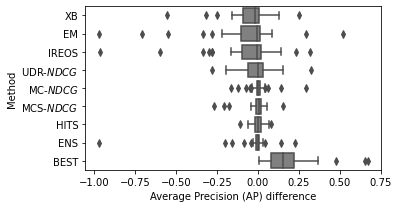

In [25]:
f = plt.figure(figsize=[3*1.88, 3])
ax = f.add_subplot(111)
columns = ['metric', 'ap']
ap_summary = pd.DataFrame(columns=columns)
metric_list = [xbs_ap, em_ap, ireos_ap, udr_ndcg_ap, mc_ndcg_ap, udr1_ndcg_ap, hits_rank_ap, model_all_ensemble_ap, best_ap]
metirc_list_names = ['XB', 'EM', 'IREOS', r"UDR-$NDCG$", r"MC-$NDCG$", r"MCS-$NDCG$", "HITS", "ENS", "BEST"]
for i in range(9):
    for j in range(len(metric_list[i])):
            ap_summary = ap_summary.append({'Method': metirc_list_names[i], 'Average Precision (AP) difference': (metric_list[i][j] - educated_random_ap[j])}, ignore_index=True)

sns.boxplot(ax = ax, x="Average Precision (AP) difference", y="Method", palette=["grey"], saturation=1.0, data=ap_summary)
f.tight_layout()
f.show()
f.savefig("ap_diff.pdf")

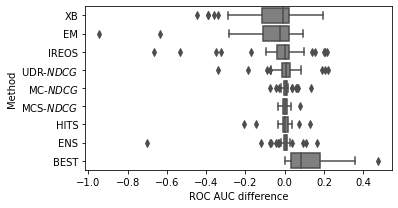

In [26]:
f = plt.figure(figsize=[3*1.88, 3])
ax = f.add_subplot(111)
columns = ['metric', 'roc']
roc_summary = pd.DataFrame(columns=columns)
metric_list = [xbs_roc, em_roc, ireos_roc, udr_ndcg_roc, mc_ndcg_roc, udr1_ndcg_roc, hits_rank_roc, model_all_ensemble_roc, best_roc]
metirc_list_names = ['XB', 'EM', 'IREOS', r"UDR-$NDCG$", r"MC-$NDCG$", r"MCS-$NDCG$", "HITS", "ENS", "BEST"]
for i in range(9):
    for j in range(len(metric_list[i])):
            roc_summary = roc_summary.append({'Method': metirc_list_names[i], 'ROC AUC difference': (metric_list[i][j] - educated_random_roc[j])}, ignore_index=True)

sns.boxplot(ax = ax, x="ROC AUC difference", y="Method", palette=["grey"], saturation=1.0, data=roc_summary)
f.tight_layout()
f.show()
f.savefig("roc_diff.pdf")


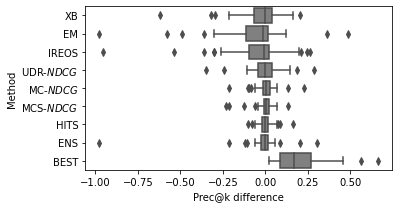

In [27]:
f = plt.figure(figsize=[3*1.88, 3])
ax = f.add_subplot(111)
columns = ['metric', 'prn']
prn_summary = pd.DataFrame(columns=columns)
metric_list = [xbs_prn, em_prn, ireos_prn, udr_ndcg_prn, mc_ndcg_prn, udr1_ndcg_prn, hits_rank_prn, model_all_ensemble_prn, best_prn]
metirc_list_names = ['XB', 'EM', 'IREOS', r"UDR-$NDCG$", r"MC-$NDCG$", r"MCS-$NDCG$", "HITS", "ENS", "BEST"]
for i in range(9):
    for j in range(len(metric_list[i])):
            prn_summary = prn_summary.append({'Method': metirc_list_names[i], 'Prec@k difference': (metric_list[i][j] - educated_random_prn[j])}, ignore_index=True)

sns.boxplot(ax = ax, x="Prec@k difference", y="Method", palette=["grey"], saturation=1.0, data=prn_summary)
f.tight_layout()
f.show()
f.savefig("prn_diff.pdf")



In [ ]:
f = plt.figure(figsize=[3*1.88, 3])
ax = f.add_subplot(111)
columns = ['metric', 'roc']
roc_summary = pd.DataFrame(columns=columns)
metric_list = [xbs_roc, em_roc, udr_ndcg_roc, mc_ndcg_roc, udr1_ndcg_roc, hits_rank_roc, model_all_ensemble_roc, best_roc]
metric_list_names = ['XB', 'EM', r"UDR-$NDCG$", r"MC-$NDCG$", r"MCS-$NDCG$", "HITS", "ENS", "BEST"]
for i in range(8):
    for j in range(len(metric_list[i])):
        roc_summary = roc_summary.append({'Method': metric_list_names[i], 'Receiver Operating Characteristic (ROC)': (metric_list[i][j] - educated_random_roc[j])}, ignore_index=True)

sns.boxplot(ax = ax, x="Receiver Operating Characteristic (ROC)", y="Method", palette=["grey"], saturation=1.0, data=roc_summary).set_title("ROC differences between methods and iForest-R")
f.tight_layout()
f.show()

In [15]:
educated_random_roc

[]

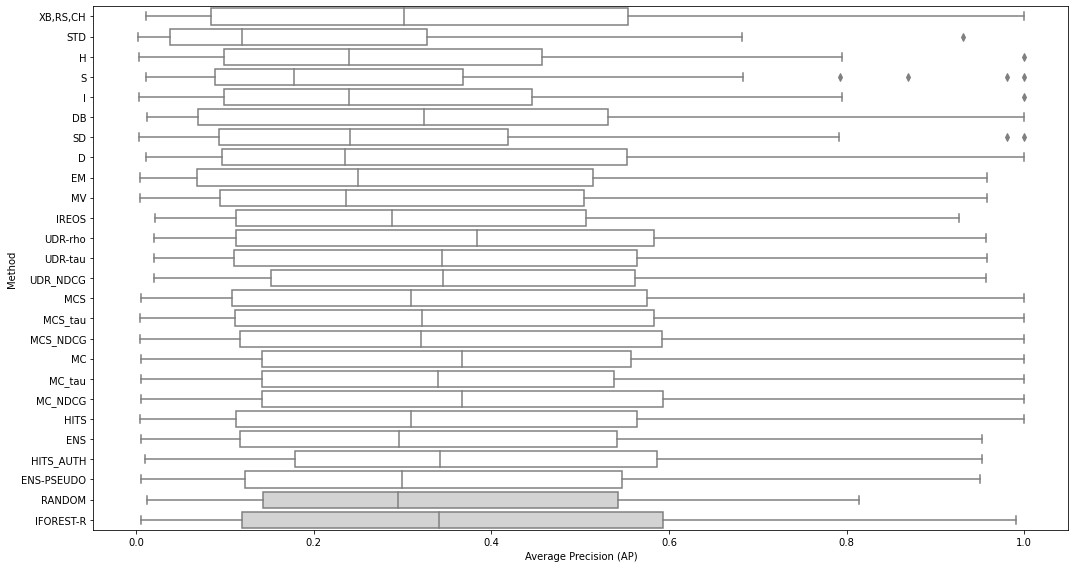

In [38]:
# all_methods = [r2_ap, std_ap, h_ap, ch_ap, s_ap, i_indices_ap, db_ap, xbs_ap, sd_ap, dunn_ap, \
#                udr_ap, udr_ndcg_ap, udr_kendall_ap, udr1_ap, udr1_ndcg_ap, udr1_kendall_ap, mc_ap, mc_ndcg_ap, mc_kendall_ap, \
#                model_all_ap, model_last_ap, model_all_ensemble_ap, model_last_ensemble_ap, em_ap, mv_ap, 
#                hits_ap, hits_rank_ap, hits_ensemble_ap, hits_rank_ensemble_ap, ireos_ap, \
#                random_random_ap, educated_random_ap]
# all_methods_str = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D", \
#                    "UDR-rho", "UDR_NDCG", "UDR-tau", "MCS", "MCS_NDCG", "MCS_tau", "MC", "MC_NDCG", "MC_tau", \
#                    "MODEL_ALL", "MODEL_LAST", "MODEL_ALL_ENSEMBLE", "MODEL_LAST_ENSEMBLE", "EM", "MV", 
#                    "HITS", "HITS_RANK", "HITS_ENSEMBLE", "HITS_RANK_ENSEMBLE", "IREOS",\
#                    "RANDOM", "IFOREST-R"]


f = plt.figure(figsize=[8*1.88, 8])
ax = f.add_subplot(111)
columns = ['metric', 'ap']
ap_summary = pd.DataFrame(columns=columns)
metric_list = [r2_ap, std_ap, h_ap, s_ap, i_indices_ap, db_ap, sd_ap, dunn_ap, \
                em_ap, mv_ap, ireos_ap,
                udr_ap, udr_kendall_ap, udr_ndcg_ap, udr1_ap, udr1_kendall_ap, udr1_ndcg_ap, mc_ap, mc_kendall_ap, mc_ndcg_ap, \
                hits_rank_ap, model_all_ap,
                hits_rank_ensemble_ap, model_all_ensemble_ap,\
                random_random_ap, educated_random_ap]
metirc_list_names = ["XB,RS,CH", "STD", "H", "S", "I", "DB", "SD", "D", \
                    "EM", "MV", "IREOS", \
                    "UDR-rho", "UDR-tau", "UDR_NDCG", "MCS", "MCS_tau", "MCS_NDCG", "MC", "MC_tau", "MC_NDCG", 
                    "HITS", "ENS", # HITS represents HITS rank, and ENS is model all
                    "HITS_AUTH", "ENS-PSEUDO", \
                    "RANDOM", "IFOREST-R"]
for i in range(26):
    for j in range(len(metric_list[i])):
            ap_summary = ap_summary.append({'Method': metirc_list_names[i], 'Average Precision (AP)': metric_list[i][j]}, ignore_index=True)

palette_array = ["white"] * 24 + ["lightgrey"] * 2
sns.boxplot(ax = ax, x="Average Precision (AP)", y="Method", palette=palette_array, saturation=1.0, data=ap_summary)
f.tight_layout()
f.show()

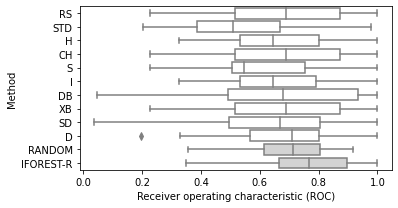

In [28]:
f = plt.figure(figsize=[3*1.88, 3])
ax = f.add_subplot(111)
columns = ['metric', 'ap']
ap_summary = pd.DataFrame(columns=columns)
metric_list = [r2_roc, std_roc, h_roc, ch_roc, s_roc, i_indices_roc, db_roc, xbs_roc, sd_roc, dunn_roc, random_random_roc, educated_random_roc]
metirc_list_names = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D","RANDOM", "IFOREST-R"]
for i in range(12):
    for j in range(len(metric_list[i])):
            ap_summary = ap_summary.append({'Method': metirc_list_names[i], 'Receiver operating characteristic (ROC)': metric_list[i][j]}, ignore_index=True)

sns.boxplot(ax = ax, x="Receiver operating characteristic (ROC)", y="Method", palette=["white","white","white","white","white","white","white","white","white","white","lightgrey","lightgrey"], saturation=1.0, data=ap_summary)
f.tight_layout()
f.show()

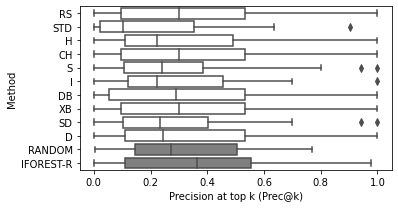

In [121]:
f = plt.figure(figsize=[3*1.88, 3])
ax = f.add_subplot(111)
ap_summary = pd.DataFrame(columns=columns)
metric_list = [r2_prn, std_prn, h_prn, ch_prn, s_prn, i_indices_prn, db_prn, xbs_prn, sd_prn, dunn_prn, random_random_prn, educated_random_prn]
metirc_list_names = ["RS", "STD", "H", "CH", "S", "I", "DB", "XB", "SD", "D","RANDOM", "IFOREST-R"]
for i in range(12):
    for j in range(len(metric_list[i])):
            ap_summary = ap_summary.append({'Method': metirc_list_names[i], 'Precision at top k (Prec@k)': metric_list[i][j]}, ignore_index=True)

sns.boxplot(ax = ax, x="Precision at top k (Prec@k)", y="Method", palette=["white","white","white","white","white","white","white","white","white","white","grey","grey"], saturation=1.0, data=ap_summary)
f.tight_layout()
f.show()